In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import geopandas as gpd
from shapely.geometry import Point 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_0414 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-apr14.csv")
df_0514 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-may14.csv")
df_0614 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-jun14.csv")
df_2015 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-janjune-15.csv")
geo_df = gpd.read_file(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\NYC Taxi Zones\geo_export_70ae9294-3624-4270-b277-a9eead8a9542.shp")
df_2014 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber_2014_object_id_dataframe.csv", index_col = False )

##### CONCATENATING 2014 DATFRAME:

In [4]:
# # MERGING ALL THE DATFRAMES TOGETHER - USING .CONCAT IN CONJUNCTION WITH .DATAFRAME() 

# df_2014 = pd.DataFrame()

# df_2014 = pd.concat([df_0414, df_0514 ,df_0614, df_2014])

# df_2014.shape

In [5]:
# geo_df.head()

In [6]:
# p = Point(-73.9549, 40.7690)

In [7]:
# geo_df['geometry'].contains(p)

In [8]:
# mask_var = geo_df['geometry'].contains(p)

In [9]:
# geo_df[mask_var]

In [10]:
# df_2014.head()

In [11]:
# df_2014['points'] = points

In [12]:
# df_2014['points'] = df_2014.apply(lambda row: Point(row['Lon'], row['Lat']), axis=1)

In [13]:
# srs = df_2014['points'].unique()
# res = []
# for point in srs:
#     mask = geo_df['geometry'].contains(point)
#     res.append(geo_df[mask]['objectid'].values[0] if mask.any() else None)
# cols = [srs, pd.Series(res)]
# pt_locs = pd.DataFrame(cols).T.rename(columns={0: 'points', 1: 'objectid'})
# merged = df_2014.merge(pt_locs, on='points')

In [14]:
# merged.head()
# merged.to_csv(r"C:\Users\Josh\Desktop\uber_2014_object_id_dataframe.csv")

#### DATA CLEANING

In [15]:
df_2014

,Unnamed: 0,Date/Time,Lat,Lon,Base,points,objectid
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,POINT (-73.95489999999999 40.769),140.0
1,1,4/13/2014 8:52:00,40.7690,-73.9549,B02764,POINT (-73.95489999999999 40.769),140.0
2,2,6/22/2014 14:46:00,40.7690,-73.9549,B02682,POINT (-73.95489999999999 40.769),140.0
3,3,4/1/2014 0:17:00,40.7267,-74.0345,B02512,POINT (-74.03449999999999 40.7267),NaN
4,4,5/26/2014 5:26:00,40.7267,-74.0345,B02598,POINT (-74.03449999999999 40.7267),NaN
...,...,...,...,...,...,...,...
1852280,1852280,6/30/2014 19:45:00,40.7548,-74.0003,B02764,POINT (-74.0003 40.7548),246.0
1852281,1852281,6/30/2014 20:05:00,40.7352,-73.9901,B02764,POINT (-73.9901 40.7352),234.0
1852282,1852282,6/30/2014 20:54:00,40.7739,-73.7327,B02764,POINT (-73.73269999999999 40.7739),NaN
1852283,1852283,6/30/2014 21:36:00,40.6749,-73.9566,B02764,POINT (-73.95659999999999 40.6749),61.0


In [16]:
# CHECKING FOR DUPLICATED VALUES: 

#df_2014
df_2014.head()
df_2014.duplicated().sum() # CHECKING HOW MANY DUPLICATE VALUES ARE IN THE NEW DATAFRAME
df_2014.drop_duplicates(inplace = True) #DROPPING DUPLICATE VALUES IN DATAFRAME
print(df_2014.shape) # CHECKING DUPLICATE VALUES HAVE BEEN REMOVED FROM DATAFRAME

#df_2015
df_2015.head()
df_2015.duplicated().sum() # CHECKING HOW MANY DUPLICATE VALUES ARE IN THE NEW DATAFRAME
df_2015.drop_duplicates(inplace = True) #DROPPING DUPLICATE VALUES IN DATAFRAME
print(df_2015.shape) # CHECKING DUPLICATE VALUES HAVE BEEN REMOVED FROM DATAFRAME

(1852285, 7)
(13372254, 4)


In [17]:
# CHECKING DATAFRAME FOR NULL VALUES 
print(df_2014.isnull().sum()) # Checking for Null Values in the 2014 Dataframe
print('-----------------------------------------')
print(df_2015.isnull().sum()) # Checking for Null Values in the 2014 Dataframe

Unnamed: 0        0
Date/Time         0
Lat               0
Lon               0
Base              0
points            0
objectid      32488
dtype: int64
-----------------------------------------
Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     160702
locationID                   0
dtype: int64


In [18]:
df_2014.columns

Index(['Unnamed: 0', 'Date/Time', 'Lat', 'Lon', 'Base', 'points', 'objectid'], dtype='object')

In [19]:
# Dropping Columns not required in the dataframes: 

#df_2014 
df_2014.drop(['Unnamed: 0', 'Lat', 'Lon', 'points'], axis = 1, inplace = True)


#df_2015
df_2015.drop('Affiliated_base_num', axis = 1, inplace = True)

In [20]:
# Checking Dataframes for drop columns: 

#df_2015
print('df_2014')
print(df_2014.head())
print('--------------------------')
#df_2015
print('df_2015')
print(df_2015.head())

df_2014
            Date/Time    Base  objectid
0    4/1/2014 0:11:00  B02512     140.0
1   4/13/2014 8:52:00  B02764     140.0
2  6/22/2014 14:46:00  B02682     140.0
3    4/1/2014 0:17:00  B02512       NaN
4   5/26/2014 5:26:00  B02598       NaN
--------------------------
df_2015
  Dispatching_base_num          Pickup_date  locationID
0               B02617  2015-05-17 09:47:00         141
1               B02617  2015-05-17 09:47:00          65
2               B02617  2015-05-17 09:47:00         100
3               B02617  2015-05-17 09:47:00          80
4               B02617  2015-05-17 09:47:00          90


In [21]:
# CHECKING DATATYPES: 

print(df_2014.dtypes) # Date/Time needs to be a date/time datatype (not a string)
print('-----------------------------------')
print(df_2015.dtypes) # Date/Time needs to be a date/time datatype (not a string)

Date/Time     object
Base          object
objectid     float64
dtype: object
-----------------------------------
Dispatching_base_num    object
Pickup_date             object
locationID               int64
dtype: object


In [22]:
df_2014.head()

,Date/Time,Base,objectid
0,4/1/2014 0:11:00,B02512,140.0
1,4/13/2014 8:52:00,B02764,140.0
2,6/22/2014 14:46:00,B02682,140.0
3,4/1/2014 0:17:00,B02512,NaN
4,5/26/2014 5:26:00,B02598,NaN


In [23]:
df_2015.head()

,Dispatching_base_num,Pickup_date,locationID
0,B02617,2015-05-17 09:47:00,141
1,B02617,2015-05-17 09:47:00,65
2,B02617,2015-05-17 09:47:00,100
3,B02617,2015-05-17 09:47:00,80
4,B02617,2015-05-17 09:47:00,90


In [24]:
# Checking the length of the dataframe: 

#df_2014
print(df_2014.shape)

#df_2015 
print(df_2015.shape)

(1852285, 3)
(13372254, 3)


In [25]:
# CHECKING DATAFRAME FOR NULL VALUES
print('df_2014') 
print(df_2014.isnull().sum()) # Note: 32488 locations are null values (* could be outside of the New York City Boundary?)
print('-'*50)
print('df_2015') 
print(df_2015.isnull().sum()) 

df_2014
Date/Time        0
Base             0
objectid     32488
dtype: int64
--------------------------------------------------
df_2015
Dispatching_base_num    0
Pickup_date             0
locationID              0
dtype: int64


In [26]:
# CONVERTING THE DATE/TIME COLUMN FROM STRING INTO A DATE/TIME DATA TYPE

df_2014['Date/Time'] = pd.to_datetime(df_2014['Date/Time']) # Note - Make sure you overwrite the correct column you want to change i.e final[Date/Time]

df_2015['Pickup_date'] = pd.to_datetime(df_2015['Pickup_date']) 

In [27]:
print(df_2014.dtypes)
print('-'*50)
print(df_2015.dtypes)

Date/Time    datetime64[ns]
Base                 object
objectid            float64
dtype: object
--------------------------------------------------
Dispatching_base_num            object
Pickup_date             datetime64[ns]
locationID                       int64
dtype: object


In [28]:
#CONVERTING 2014 objectid COLUMN FROM A FLOAT INTO A INTEGER VALUE: 

#Filling NA VALUES WITH 0 IN ORDER TO CONVERT DATA TYPE / CONVERT THE COLUMN DATATYPE FROM FLOAT TO INT: 
df_2014['objectid'] = df_2014['objectid'].fillna(0).astype(int)


In [29]:
# CREATING AN MONTH COLUMN IN DATAFRAME

#df_2014
df_2014['month'] = df_2014['Date/Time'].dt.month

#df_2015
df_2015['month'] = df_2015['Pickup_date'].dt.month

In [30]:
# CREATING AN HOUR COLUMN IN DATAFRAME

#df_2014
df_2014['hour'] = df_2014['Date/Time'].dt.hour

#df_2015
df_2015['hour'] = df_2015['Pickup_date'].dt.hour


In [31]:
# CREATING AN DAY NUMBER COLUMN IN DATAFRAME

#df_2014
df_2014['day'] = df_2014['Date/Time'].dt.day

#df_2015
df_2015['day'] = df_2015['Pickup_date'].dt.day


In [32]:
# CONVERTING DATETIME INTO DAY_NAME: 

#df_2014
df_2014['day_name'] = df_2014['Date/Time'].dt.day_name()

#df_2015
df_2015['day_name'] = df_2015['Pickup_date'].dt.day_name()

In [33]:
# Checking Column Names of Dataframe: 

print(df_2014.columns)
print('-'*50)
print(df_2015.columns)




Index(['Date/Time', 'Base', 'objectid', 'month', 'hour', 'day', 'day_name'], dtype='object')
--------------------------------------------------
Index(['Dispatching_base_num', 'Pickup_date', 'locationID', 'month', 'hour',
       'day', 'day_name'],
      dtype='object')


In [34]:
#renaming columns into lowercase and without spaces: 

#df_2014
df_2014.rename({'Date/Time':'date_time', 'Base':'base', 'objectid':'location_id'}, axis = 1, inplace= True)

#df_2015
df_2015.rename({'Dispatching_base_num':'base', 'Pickup_date':'date_time', 'locationID':'location_id' }, axis = 1, inplace= True)


In [35]:
# Checking renamed columns: 

#df_2014
print(df_2014.columns)
print('-'*50)
#df_2014
print(df_2015.columns)

Index(['date_time', 'base', 'location_id', 'month', 'hour', 'day', 'day_name'], dtype='object')
--------------------------------------------------
Index(['base', 'date_time', 'location_id', 'month', 'hour', 'day', 'day_name'], dtype='object')


In [36]:
#Re-index the columns to be the same: 

#df_2014
df_2014 = df_2014.reindex(['date_time', 'month', 'day', 'day_name', 'hour', 'base', 'location_id'], axis = 1)

#df_2015
df_2015 = df_2015.reindex(['date_time', 'month', 'day', 'day_name', 'hour', 'base', 'location_id'], axis = 1)

In [37]:
# SORT VALUES BY DATE: 

#df_2014
df_2014.sort_values(by='date_time', ascending= True, inplace = True)

#df_2015
df_2015.sort_values(by='date_time', ascending= True, inplace = True)

In [38]:
# REINDEX THE DATAFRAMES: 

#df_2014: 
df_2014.reset_index(0, inplace = True)

# #df_2015:
df_2015.reset_index(0, inplace = True)


# DROP INDEX COLUMN FROM DATAFRAMES:
 
#df_2014
df_2014.drop('index', axis = 1, inplace = True)

#df_2015
df_2015.drop('index', axis = 1, inplace = True)

In [39]:
df_2014.head()

,date_time,month,day,day_name,hour,base,location_id
0,2014-04-01 00:00:00,4,1,Tuesday,0,B02598,232
1,2014-04-01 00:00:00,4,1,Tuesday,0,B02598,141
2,2014-04-01 00:00:00,4,1,Tuesday,0,B02682,144
3,2014-04-01 00:01:00,4,1,Tuesday,0,B02617,113
4,2014-04-01 00:02:00,4,1,Tuesday,0,B02598,100


In [40]:
df_2015.head()

,date_time,month,day,day_name,hour,base,location_id
0,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144
1,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232


#### DATA ANALYSIS

##### LINE PLOT - Amount of Pick Ups Over Days of Week (Q2 - 2014)

In [41]:
pvt_pickupsbydayQ214 = df_2014.groupby(['hour','day_name']).size().unstack()
pvt_pickupsbydayQ214_sorted = pvt_pickupsbydayQ214.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pvt_pickupsbydayQ214_sorted

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,2165,2165,2682,3517,5122,10273,13693
1,1223,1186,1484,2002,2966,6964,8843
2,953,873,1077,1376,1921,4493,5495
3,2212,1532,1769,2132,2644,3453,3868
4,3651,2588,2738,3207,3398,2473,2316
5,5776,4939,5167,5879,5159,2611,2138
6,10166,10529,11516,12419,10471,3139,2370
7,13322,14559,15876,16624,14524,4027,3052
8,11954,12359,13889,15429,13677,5363,4331


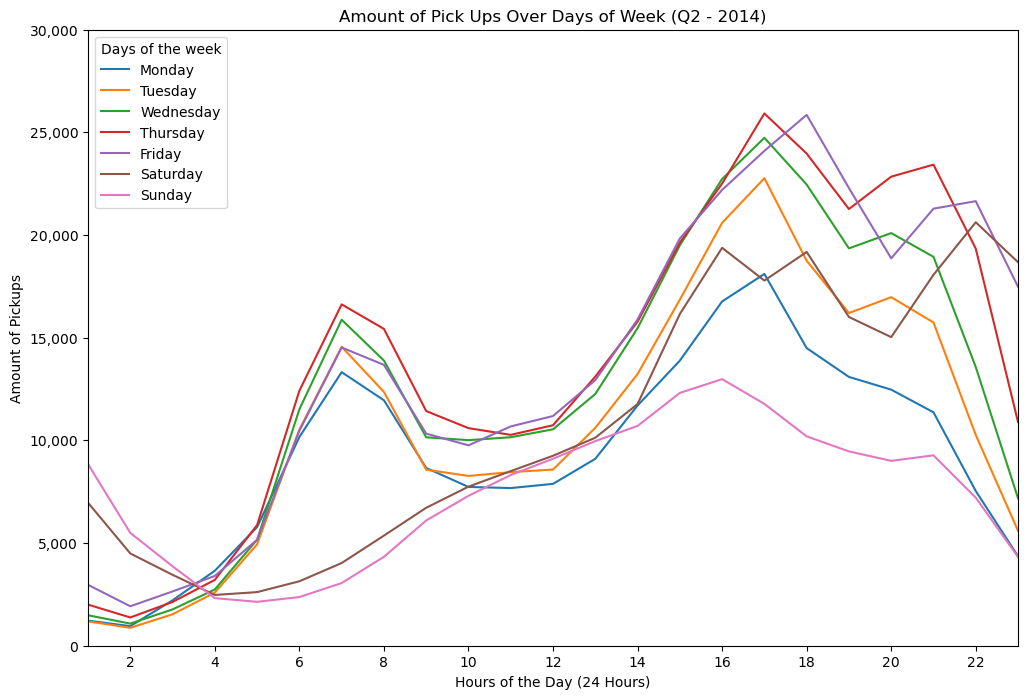

In [42]:

# Uber Blue - #1fbad6
# Uber Grey - #C0C0C8
# Dark Grey - #2D2D2D

#THURSDAY COMPARE TO MONDAY - HIGHLIGHT: 

custom_thurs = ['#2D2D2D', '#C0C0C8', '#C0C0C8', '#1fbad6', '#C0C0C8', '#C0C0C8', '#C0C0C8']


plt.figure(figsize=(12,8))
sns.lineplot(data=pvt_pickupsbydayQ214_sorted, dashes = False,).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups Over Days of Week (Q2 - 2014)",  xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22], ylim = (0, 30000), yticklabels = ['0', '5,000', '10,000', '15,000', '20,000', '25,000', '30,000']);
plt.legend(title="Days of the week")
plt.show()



##### LINE PLOT - Amount of Pick Ups Over Days of Week (Q1 - 2015)

In [43]:
df_2015.head()

,date_time,month,day,day_name,hour,base,location_id
0,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144
1,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232


In [44]:
# Creating mask for the first quarter of 2015 
q12015 = df_2015['month'].isin([1,2,3]) 

In [45]:
df_2015[q12015].tail()

,date_time,month,day,day_name,hour,base,location_id
6203793,2015-03-31 23:59:00,3,31,Tuesday,23,B02617,113
6203794,2015-03-31 23:59:00,3,31,Tuesday,23,B02617,114
6203795,2015-03-31 23:59:00,3,31,Tuesday,23,B02764,34
6203796,2015-03-31 23:59:00,3,31,Tuesday,23,B02617,186
6203797,2015-03-31 23:59:00,3,31,Tuesday,23,B02617,48


In [46]:
pvt_pickupsbydayQ115 = df_2015[q12015].groupby(['hour','day_name']).size().unstack()
pvt_pickupsbydayQ115_sorted = pvt_pickupsbydayQ115.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pvt_pickupsbydayQ115_sorted

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,21005,16954,19532,28499,33460,61501,66374
1,11632,9075,10506,17723,18566,44084,51834
2,6939,5461,6198,13898,11202,30690,35240
3,5291,3724,4115,10657,7745,21418,26598
4,7789,5740,6183,10164,9210,15421,17691
5,12934,10243,10247,12717,12173,11187,11045
6,21395,19990,19666,21474,20846,11298,9841
7,34021,34398,34253,36631,35312,13294,10335
8,44547,44489,44438,47031,45391,18554,13909


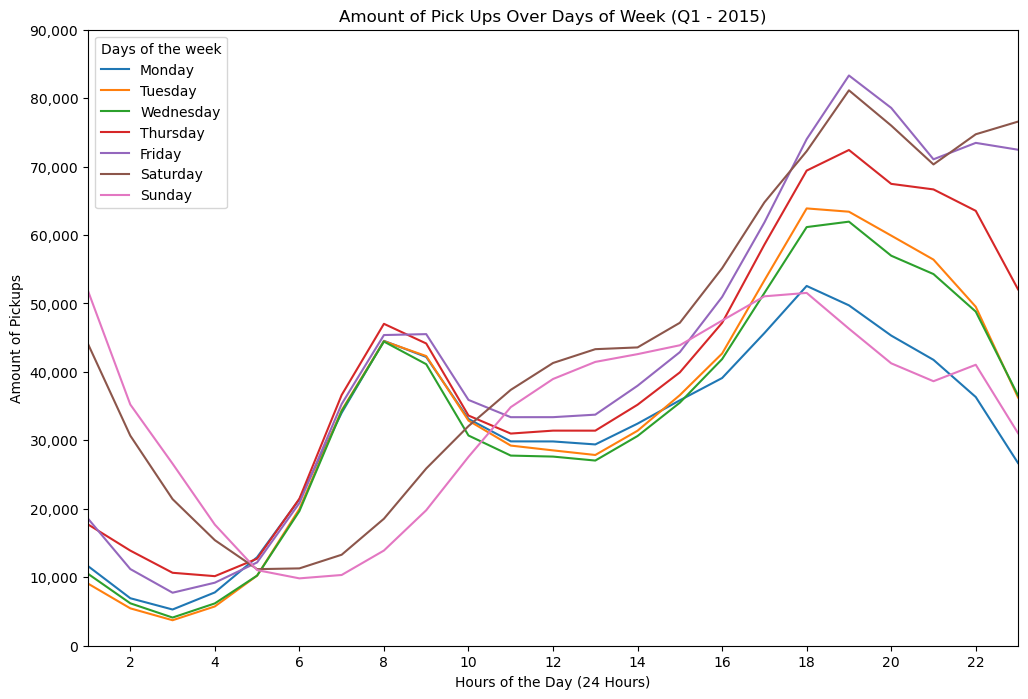

In [47]:
plt.figure(figsize=(12,8))
sns.lineplot(data=pvt_pickupsbydayQ115_sorted, dashes = False,).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups Over Days of Week (Q1 - 2015)",  xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22], ylim = (0, 90000), yticklabels = ['0', '10,000', '20,000', '30,000',  '40,000',  '50,000', '60,000', '70,000', '80,000', '90,000']);
plt.legend(title="Days of the week")
plt.show()

##### LINE PLOT - Amount of Pick Ups Over Days of Week (Q2 - 2015)

In [48]:
# Creating mask for the first quarter of 2015 
q22015 = df_2015['month'].isin([4,5,6]) 

In [49]:
# Checking new mask created for the second quarter of 2015
df_2015[q22015].head()

,date_time,month,day,day_name,hour,base,location_id
6203798,2015-04-01 00:01:00,4,1,Wednesday,0,B02598,158
6203799,2015-04-01 00:02:00,4,1,Wednesday,0,B02764,148
6203800,2015-04-01 00:03:00,4,1,Wednesday,0,B02764,45
6203801,2015-04-01 00:03:00,4,1,Wednesday,0,B02682,170
6203802,2015-04-01 00:03:00,4,1,Wednesday,0,B02765,107


In [50]:
pvt_pickupsbydayQ215 = df_2015[q22015].groupby(['hour','day_name']).size().unstack()
pvt_pickupsbydayQ215_sorted = pvt_pickupsbydayQ215.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) # Re-indexing the pivot chart in order for the days of the week to be correctly ordered
pvt_pickupsbydayQ215_sorted

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,26603,25705,30396,34501,46419,71054,75299
1,15461,14886,16548,18932,25997,51478,61661
2,9455,8730,9668,11042,16050,36608,45206
3,7170,6040,6755,7882,11331,26045,31445
4,11000,8693,9103,10382,13839,20408,22435
5,17030,14681,14686,16002,17390,14659,14092
6,26044,24694,24716,25867,25909,15286,12952
7,37259,39691,39803,40474,38253,17906,14443
8,48115,52347,50794,51465,50261,24669,19328


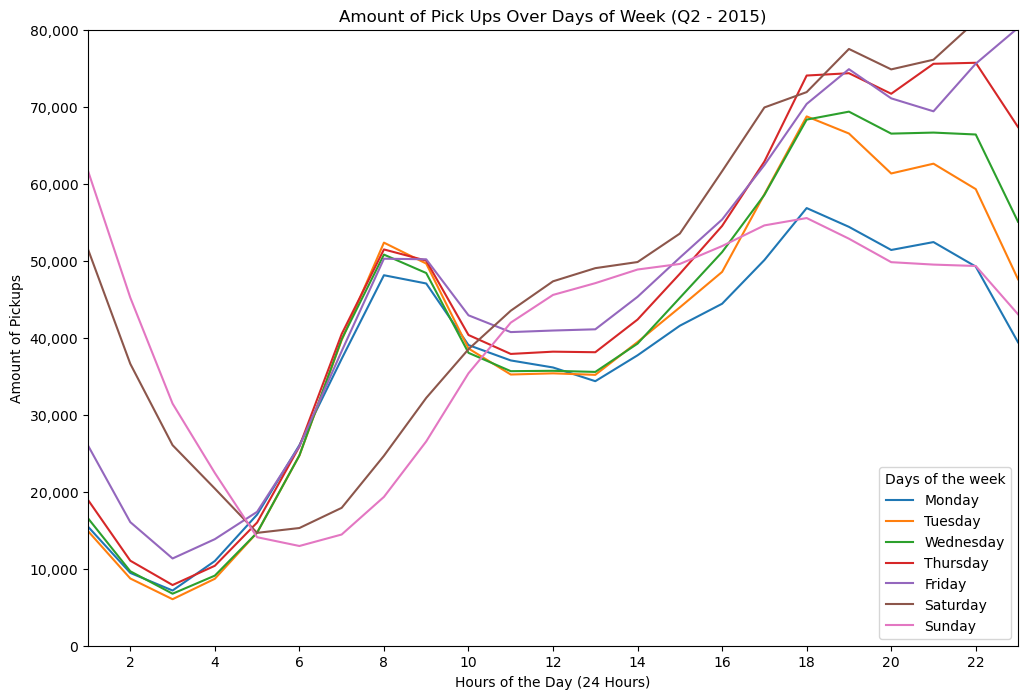

In [51]:
plt.figure(figsize=(12,8))
sns.lineplot(data=pvt_pickupsbydayQ215_sorted, dashes = False,).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups Over Days of Week (Q2 - 2015)",  xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22], ylim = (0, 80000), yticklabels = ['0', '10,000', '20,000', '30,000',  '40,000',  '50,000', '60,000', '70,000', '80,000']);
plt.legend(title="Days of the week")
plt.show()

### AMOUNT OF PICKUPS PER MONTH: 

##### BAR CHART - PICK UPS OF MONTH - Q2 2014

In [53]:
apr_14 = df_2014['month'].isin([4])
may_14 = df_2014['month'].isin([5])
jun_14 = df_2014['month'].isin([6])

In [76]:
apr_total = len(df_2014[apr_14])
may_total = len(df_2014[may_14])
jun_total = len(df_2014[jun_14])


In [77]:
print(apr_total)
print(may_total)
print(jun_total)

556767
642360
653158


In [90]:
data_1 = {'Months' : ['April', 'May', 'June'],
        'Totals' : [apr_total,  may_total,  jun_total]}

months_q22014 = pd.DataFrame(data_1)

print(months_q22014)

  Months  Totals
0  April  556767
1    May  642360
2   June  653158


In [84]:
x1 = months_q22014['Months']
y1 = months_q22014['Totals']



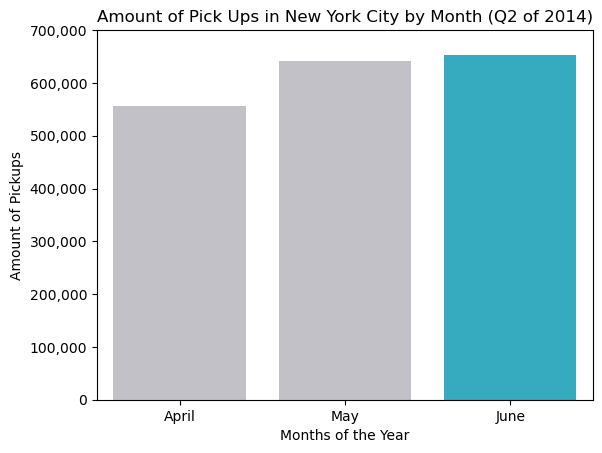

In [123]:
custom_colours1 = ['#C0C0C8', '#C0C0C8', '#1fbad6']

sns.barplot(x = x1, y = y1, palette = custom_colours1).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q2 of 2014)", yticklabels = ['0', '100,000', '200,000', '300,000',  '400,000',  '500,000', '600,000', '700,000'], ylim = (0,700000));
plt.show()



##### BAR CHART - PICK UPS OF MONTH - Q1 2015

In [91]:
jan_15 = df_2015['month'].isin([1])
feb_15 = df_2015['month'].isin([2])
mar_15 = df_2015['month'].isin([3])

In [92]:
jan_total = len(df_2015[jan_15])
feb_total = len(df_2015[feb_15])
mar_total = len(df_2015[mar_15])

In [94]:
data_2 = {'Months' : ['January', 'February', 'March'],
        'Totals' : [jan_total,  feb_total,  mar_total]}

months_q12015 = pd.DataFrame(data_2)

print(months_q12015)

     Months   Totals
0   January  1918970
1  February  2222189
2     March  2062639


In [95]:
x2 = months_q12015['Months']
y2 = months_q12015['Totals']


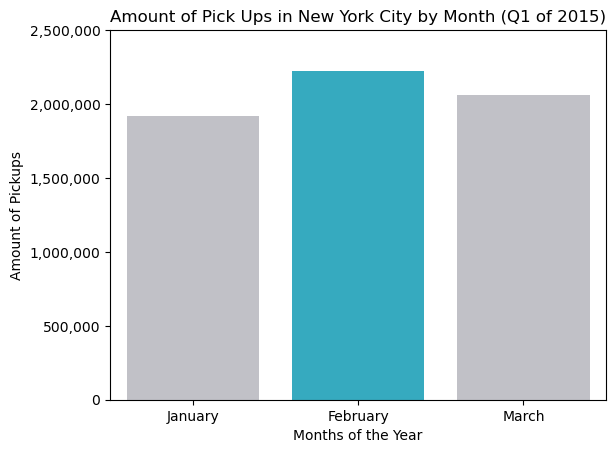

In [124]:
custom_colours2 = ['#C0C0C8', '#1fbad6', '#C0C0C8']

sns.barplot(x = x2, y = y2, palette = custom_colours2).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q1 of 2015)", yticklabels = ['0','500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000'], ylim = (0,2500000));
plt.show()


##### BAR CHART - PICK UPS OF MONTH - Q2 2015

In [107]:
apr_15 = df_2015['month'].isin([4])
may_15 = df_2015['month'].isin([5])
jun_15 = df_2015['month'].isin([6])

In [108]:
apr15_total = len(df_2015[apr_15])
may15_total = len(df_2015[may_15])
jun15_total = len(df_2015[jun_15])

In [117]:
data_3 = {'Months' : ['April', 'May', 'June'],
        'Totals' : [apr15_total,  may15_total,  jun15_total]}

months_q22015 = pd.DataFrame(data_3)

print(months_q22015)

  Months   Totals
0  April  2112705
1    May  2483980
2   June  2571771


In [110]:
x3 = months_q22015['Months']
y3 = months_q22015['Totals']

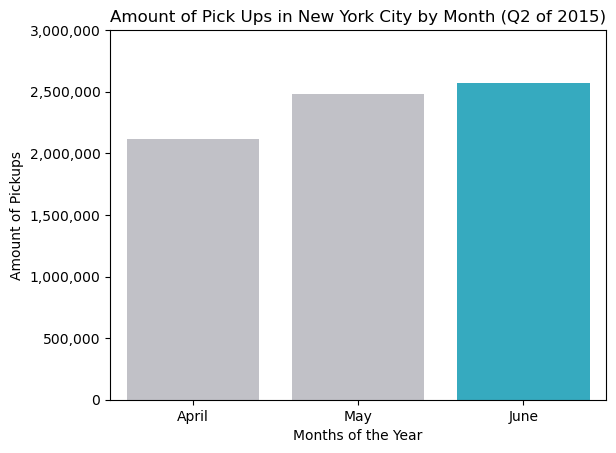

In [125]:
sns.barplot(x = x3, y = y3, palette = custom_colours1).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q2 of 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000'], ylim = (0,3000000));
plt.show()


##### BAR CHART - MOST POPULAR MONTH - Q1/Q2 2015 

In [118]:
data_4 = {'Months' : ['January', 'February', 'March', 'April', 'May', 'June'],
        'Totals' : [jan_total, feb_total, mar_total, apr15_total,  may15_total,  jun15_total]}

months_2015 = pd.DataFrame(data_4)

print(months_2015)

     Months   Totals
0   January  1918970
1  February  2222189
2     March  2062639
3     April  2112705
4       May  2483980
5      June  2571771


In [119]:
x4 = months_2015['Months']
y4 = months_2015['Totals']

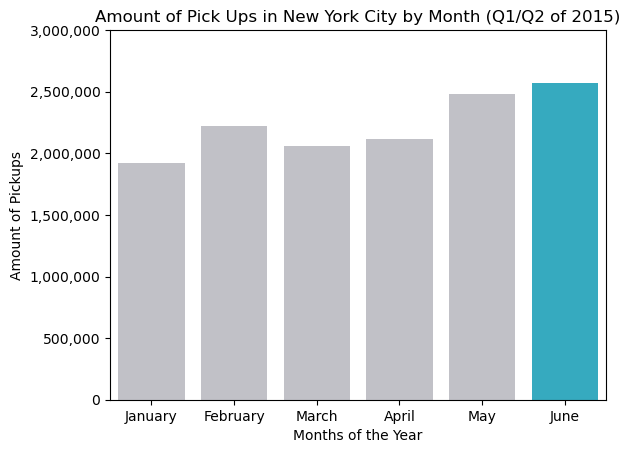

In [126]:
colour_6months = ['#C0C0C8', '#C0C0C8', '#C0C0C8', '#C0C0C8', '#C0C0C8', '#1fbad6']

sns.barplot(x = x4, y = y4, palette = colour_6months).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q1/Q2 of 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000'], ylim = (0,3000000));
plt.show()


### PICKUPS BY DAY

In [241]:
df_2014.head()

,date_time,month,day,day_name,hour,base,location_id
0,2014-04-01 00:00:00,4,1,Tuesday,0,B02598,232
1,2014-04-01 00:00:00,4,1,Tuesday,0,B02598,141
2,2014-04-01 00:00:00,4,1,Tuesday,0,B02682,144
3,2014-04-01 00:01:00,4,1,Tuesday,0,B02617,113
4,2014-04-01 00:02:00,4,1,Tuesday,0,B02598,100


In [242]:
mon14 = df_2014['day'].isin([1])
tue14 = df_2014['day'].isin([2])
wed14 = df_2014['day'].isin([3])
thu14 = df_2014['day'].isin([4])
fri14 = df_2014['day'].isin([5])
sat14 = df_2014['day'].isin([6])
sun14 = df_2014['day'].isin([7])

In [248]:
mon14_total = df_2014[mon14].shape[0]
tue14_total = df_2014[tue14].shape[0]
wed14_total = df_2014[wed14].shape[0]
thu14_total = df_2014[thu14].shape[0]
fri14_total = df_2014[fri14].shape[0]
sat14_total = df_2014[sat14].shape[0]
sun14_total = df_2014[sun14].shape[0]

In [249]:
data_5 = {'Months' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        'Totals' : [mon14_total, tue14_total, wed14_total, thu14_total,  fri14_total,  sat14_total, sun14_total]}

days_2014 = pd.DataFrame(data_5)

print(days_2014)

      Months  Totals
0     Monday   53140
1    Tuesday   58353
2  Wednesday   64737
3   Thursday   62475
4     Friday   64805
5   Saturday   56537
6     Sunday   61381


In [250]:
x5 = days_2014['Months']
y5 = days_2014['Totals']

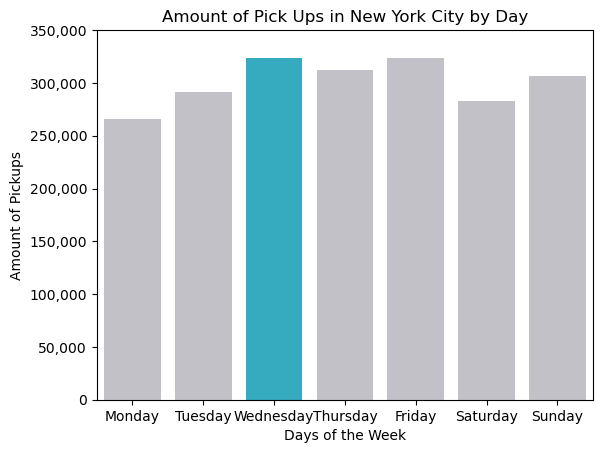

In [253]:
custom_colours2 = ['#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8']

sns.barplot(x = x5, y = y5, palette = custom_colours2).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day", yticklabels = ['0', '50,000', '100,000', '150,000', '200,000', '250,000', '300,000', '350,000',], ylim = (0,70000));
plt.show()

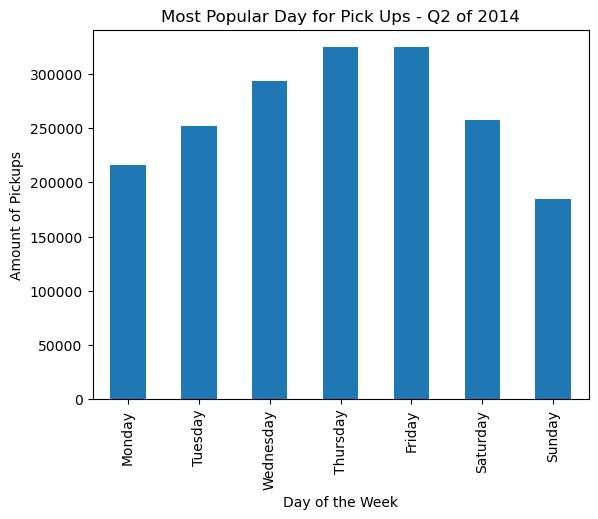

In [184]:
q14_months.plot(kind='bar')
plt.title('Most Popular Day for Pick Ups - Q2 of 2014')
plt.xlabel('Day of the Week')
plt.ylabel('Amount of Pickups')
plt.show()

In [200]:
q14_months.head()

,date_time
day_name,
Monday,216251
Tuesday,252200
Wednesday,293349
Thursday,324312
Friday,324217


In [214]:
q14_month_t = q14_months.T

In [215]:
q14_month_t

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
date_time,216251,252200,293349,324312,324217,257819,184137


In [220]:
sns.countplot(data = q14_month_t, x = 'date_time')

ValueError: Could not interpret input 'date_time'

In [ ]:
days = q1402.copy()


monday = days.query('`day_name` == "Monday"')
tuesday = days.query('`day_name` == "Tuesday"')
wednesday = days.query('`day_name` == "Wednesday"')
thursday = days.query('`day_name` == "Thursday"')
friday = days.query('`day_name` == "Friday"')
saturday = days.query('`day_name` == "Saturday"')
sunday = days.query('`day_name` == "Sunday"')

In [ ]:
monday_total = monday.query('`day_name` == "Monday"').value_counts().sum()
tuesday_total = tuesday.query('`day_name` == "Tuesday"').value_counts().sum()
wednesday_total = wednesday.query('`day_name` == "Wednesday"').value_counts().sum()
thursday_total = thursday.query('`day_name` == "Thursday"').value_counts().sum()
friday_total = friday.query('`day_name` == "Friday"').value_counts().sum()
saturday_total = saturday.query('`day_name` == "Saturday"').value_counts().sum()
sunday_total = sunday.query('`day_name` == "Sunday"').value_counts().sum()

print(monday_total, tuesday_total, wednesday_total, thursday_total, friday_total, saturday_total, sunday_total)

216251 252200 293349 324312 324217 257819 184137


In [ ]:
day = {'Day' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        'Totals' : [monday_total, tuesday_total, wednesday_total,  thursday_total,  friday_total, saturday_total, sunday_total]}

daytotal = pd.DataFrame(day)

print(daytotal)

         Day  Totals
0     Monday  216251
1    Tuesday  252200
2  Wednesday  293349
3   Thursday  324312
4     Friday  324217
5   Saturday  257819
6     Sunday  184137


In [ ]:
daytotal.head()

,Day,Totals
0,Monday,216251
1,Tuesday,252200
2,Wednesday,293349
3,Thursday,324312
4,Friday,324217


In [ ]:
x2 = daytotal['Day']
y2 = daytotal['Totals']

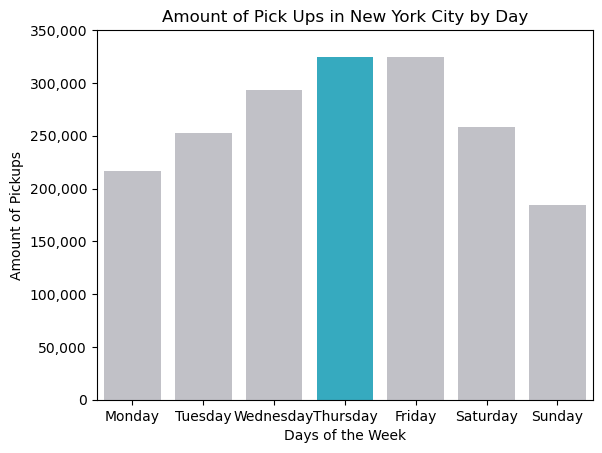

In [ ]:
custom_colours2 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8', '#c0c0c8', '#c0c0c8']

sns.barplot(x = x2, y = y2, palette = custom_colours2).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day", yticklabels = ['0', '50,000', '100,000', '150,000', '200,000', '250,000', '300,000', '350,000',], ylim = (0,350000));
plt.show()

### MOST POPULAR BASE:

In [ ]:
q1402.head(2)

,date_time,lat,lon,base,hour,day_name,month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday,4


In [ ]:
q1402['base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [ ]:
base_1 = q1402.query('`base` == "B02512"') # BASE NAME = UNTER - 40.75258189875482, -74.0065557551885
base_2 = q1402.query('`base` == "B02598"') # BASE NAME = HINTER - 40.75258189875482, -74.0065557551885
base_3 = q1402.query('`base` == "B02617"') # BASE NAME = WEITER - 40.75258189875482, -74.0065557551885
base_4 = q1402.query('`base` == "B02682"') # BASE NAME = SCHMECKEN - 40.75258189875482, -74.0065557551885
base_5 = q1402.query('`base` == "B02764"') # BASE NAME = DANACH - NY - 40.75258189875482, -74.0065557551885


In [ ]:
base1total = base_1.value_counts().sum()
base2total = base_2.value_counts().sum()
base3total = base_3.value_counts().sum()
base4total = base_4.value_counts().sum()
base5total = base_5.value_counts().sum()

In [ ]:
base = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH'],
        'Totals' : [base1total, base2total, base3total,  base4total,  base5total]}

basetotal = pd.DataFrame(base)

print(basetotal)

       Base  Totals
0     UNTER  101373
1    HINTER  680282
2    WEITER  404007
3  CHMECKEN  638502
4    DANACH   28121


In [ ]:
x1 = basetotal['Base']
y1 = basetotal['Totals']

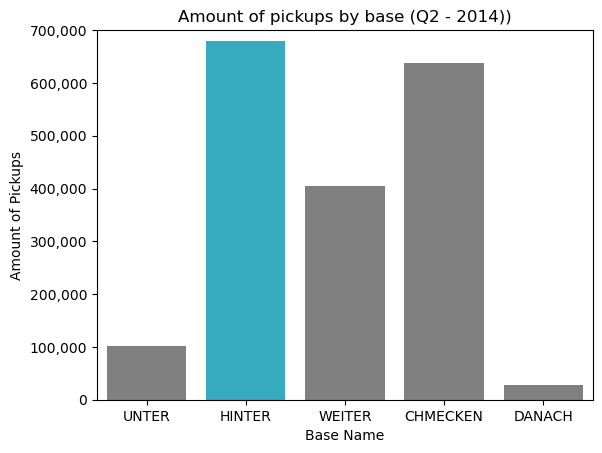

In [ ]:
custom_colour3 = ['grey' , '#1fbad6', 'grey', 'grey', 'grey']

sns.barplot(x = x1, y = y1, palette= custom_colour3).set(xlabel = "Base Name", ylabel = "Amount of Pickups", title = "Amount of pickups by base (Q2 - 2014))", yticklabels = ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000', '700,000', '800,000'], ylim = (0,700000));
plt.show()

### NYC WEATHER

In [ ]:
nyc_weather = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\New York Weather (Yearly - 2016)\weather_data_nyc.csv")

In [ ]:
nyc_weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [ ]:
# CLEANING THE DATASET 

nyc_weather.duplicated().sum() # CHECK FOR DUPLICATES

nyc_weather['date'] = pd.to_datetime(nyc_weather['date'], format='mixed', dayfirst=1-1-2016) # Converting the Date column into a datatime data type

nyc_weather = nyc_weather.drop(['snow fall', 'snow depth'], axis = 1) #Removing unwanted columns from DataFrame

nyc_weather.replace('T', 0.0, inplace=True) # Replacing all 'T' values in DataFrame to '0.0' to convert to float value.

nyc_weather['precipitation'] = nyc_weather['precipitation'].astype(float) # Converting precipitation column into a float datatype

nyc_weather['month'] = nyc_weather['date'].dt.month #CONVERT THE DATE COLUMN TO MONTHS


In [ ]:
nyc_weather.describe()
nyc_weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,month
0,2016-01-01,42,34,38.0,0.0,1
1,2016-01-02,40,32,36.0,0.0,1
2,2016-01-03,45,35,40.0,0.0,1
3,2016-01-04,36,14,25.0,0.0,1
4,2016-01-05,29,11,20.0,0.0,1


### NYC WEATHER - MONTHLY RAINFALL

In [ ]:
nyc_rain = nyc_weather.copy()

In [ ]:
nyc_weather.dtypes

date                   datetime64[ns]
maximum temperature             int64
minimum temperature             int64
average temperature           float64
precipitation                 float64
month                           int32
dtype: object

In [ ]:
apr = nyc_weather.query('`month` == 4')
may = nyc_weather.query('`month` == 5')
jun = nyc_weather.query('`month` == 6')
jul = nyc_weather.query('`month` == 7')
aug = nyc_weather.query('`month` == 8')
sep = nyc_weather.query('`month` == 9')

In [ ]:
sep.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,month
244,2016-09-01,79,69,74.0,0.5,9
245,2016-09-02,81,66,73.5,0.0,9
246,2016-09-03,75,66,70.5,0.0,9
247,2016-09-04,80,65,72.5,0.0,9
248,2016-09-05,84,65,74.5,0.0,9


In [ ]:
apr_rain = round(apr['precipitation'].sum(),2)
may_rain = round(may['precipitation'].sum(),2)
jun_rain = round(jun['precipitation'].sum(),2)
jul_rain = round(jul['precipitation'].sum(),2)
aug_rain = round(aug['precipitation'].sum(),2)
sep_rain = round(sep['precipitation'].sum(),2)


In [ ]:
print(apr_rain)
print(may_rain)
print(jun_rain)
print(jul_rain)
print(aug_rain)
print(sep_rain)

1.61
3.75
2.6
7.02
1.97
2.79


In [ ]:
nyc_rain = {'months' : ['April', 'May', 'June', 'July', 'August', 'September'],
        'total_rain' : [apr_rain, may_rain, jun_rain, jul_rain, aug_rain, sep_rain]}

nyc_rain = pd.DataFrame(nyc_rain)

print(nyc_rain)

      months  total_rain
0      April        1.61
1        May        3.75
2       June        2.60
3       July        7.02
4     August        1.97
5  September        2.79


In [ ]:
nyc_rain.head()

,months,total_rain
0,April,1.61
1,May,3.75
2,June,2.60
3,July,7.02
4,August,1.97


In [ ]:
months_x = nyc_rain['months']
rain_y = nyc_rain['total_rain']

- What colours should be used in 

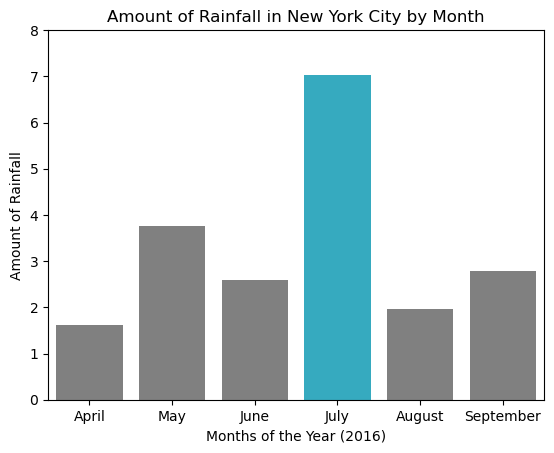

In [ ]:
colours_5 = ['grey', 'grey', 'grey', '#1fbad6', 'grey' , 'grey']

sns.barplot(x = months_x, y = rain_y, palette = colours_5  ).set(xlabel = "Months of the Year (2016)", ylabel = "Amount of Rainfall", title = "Amount of Rainfall in New York City by Month", yticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8'], ylim = (0,8));
plt.show()

# LABEL UNITS ON Y AXIS 


NYC WEATHER - TEMP

In [ ]:
apr = apr.drop(['precipitation', 'average temperature'], axis = 1)
may = may.drop(['precipitation', 'average temperature'], axis = 1)
jun = jun.drop(['precipitation', 'average temperature'], axis = 1)
jul = jul.drop(['precipitation', 'average temperature'], axis = 1)
aug = aug.drop(['precipitation', 'average temperature'], axis = 1)
sep = sep.drop(['precipitation', 'average temperature'], axis = 1)

In [ ]:
apr.head()

,date,maximum temperature,minimum temperature,month
91,2016-04-01,79,61,4
92,2016-04-02,61,49,4
93,2016-04-03,50,34,4
94,2016-04-04,45,29,4
95,2016-04-05,43,26,4


In [ ]:
# MAX TEMP 

apr_max = apr['maximum temperature'].max()
may_max = may['maximum temperature'].max()
jun_max = jun['maximum temperature'].max()
jul_max = jul['maximum temperature'].max()
aug_max = aug['maximum temperature'].max()         
sep_max = sep['maximum temperature'].max()

# MIN TEMP

apr_min = apr['minimum temperature'].min()
may_min = may['minimum temperature'].min()
jun_min = jun['minimum temperature'].min()
jul_min = jul['minimum temperature'].min()
aug_min = aug['minimum temperature'].min()
sep_min = sep['minimum temperature'].min()

# AVERAGE TEMP

apr_avg = (apr_max + apr_min) / 2
may_avg = (may_max + may_min) / 2
jun_avg = (jun_max + jun_min) / 2
jul_avg = (jul_max + jul_min) / 2
aug_avg = (aug_max + aug_min) / 2
sep_avg = (sep_max + sep_min) / 2



In [ ]:
print(apr_avg)
print(may_avg)
print(jun_avg)
print(jul_avg)
print(aug_avg)
print(sep_avg)

54.0
67.5
70.0
79.5
78.5
72.5


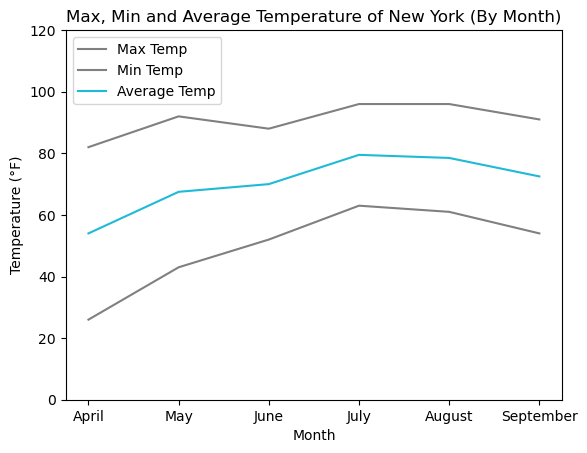

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colour4 = ['grey', '#1fbad6'] #COLOURS TO UBER COLOUR SCHEME

# Sample data
temp = {
    'x': ['April', 'May', 'June', 'July', 'August', 'September'],
    'y1': [apr_max, may_max, jun_max, jul_max, aug_max, sep_max],
    'y2': [apr_min, may_min, jun_min, jul_min, aug_min, sep_min],
    'y3': [apr_avg, may_avg, jun_avg, jul_avg, aug_avg, sep_avg],
}

# Convert data to a DataFrame
import pandas as pd
nyc_temp = pd.DataFrame(temp)

# Plot multiple lines
sns.lineplot(data=nyc_temp, x='x', y='y1', label='Max Temp', color = colour4[0]).set(title = 'Max, Min and Average Temperature of New York (By Month)', xlabel = 'Month', ylabel = 'Temperature (°F)', yticklabels = ['0', '20', '40', '60', '80', '100', '120'], ylim = (0,120));
sns.lineplot(data=nyc_temp, x='x', y='y2', label='Min Temp', color = colour4[0])
sns.lineplot(data=nyc_temp, x='x', y='y3', label='Average Temp',color = colour4[1])


# Show the plot
plt.legend()
plt.show()

In [ ]:
print(apr_max)
print(apr_min)
print(apr_avg)

82
26
54.0


#### 2nd Quarter of 2015 data: 

In [ ]:
q1502 = df_2015.copy()

In [ ]:
q1502.tail()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45
14270478,B02765,2015-05-08 15:44:00,B02682,144


In [ ]:
q1502.sample(10)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
11836148,B02764,2015-06-13 20:19:00,B02764,90
1737551,B02764,2015-01-10 12:03:04,B02764,231
14076582,B02835,2015-06-29 10:40:00,B02835,88
832418,B02764,2015-01-01 18:25:48,B02764,140
3273559,B02682,2015-05-26 09:35:00,B02682,262
10798782,B02682,2015-03-16 04:29:00,B02682,148
3088713,B02682,2015-06-22 16:20:00,B02682,236
8536657,B02682,2015-06-06 15:54:00,B02512,113
5753185,B02598,2015-04-03 15:13:00,B02598,263
10656947,B02682,2015-03-14 11:05:00,B02682,238


In [ ]:
q1502.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [ ]:
q1502.describe()

,locationID
count,1.427048e+07
mean,1.520574e+02
std,7.159620e+01
min,1.000000e+00
25%,9.200000e+01
50%,1.570000e+02
75%,2.300000e+02
max,2.650000e+02


In [ ]:
q1502.describe(include = 'object')

,Dispatching_base_num,Pickup_date,Affiliated_base_num
count,14270479,14270479,14108284
unique,8,2744783,284
top,B02764,2015-06-27 22:19:00,B02764
freq,5753653,213,4352321


#### CLEANING DATA: 

In [ ]:
q1502.tail()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45
14270478,B02765,2015-05-08 15:44:00,B02682,144


In [ ]:
q1502.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [ ]:
q1502.shape

(14270479, 4)

In [ ]:
q1502.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')

In [ ]:
# Dropping thr affiliated base number: 
q1502.drop('Affiliated_base_num', axis = 1, inplace = True)

In [ ]:
df_2015.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [ ]:
# Rename the columns of the dataframe:

q1502 = q1502.rename({'Dispatching_base_num':'base_number', 'Pickup_date':'date','locationID':'location_id'}, axis = 1)


In [ ]:
q1502.head()

,base_number,date,location_id
0,B02617,2015-05-17 09:47:00,141
1,B02617,2015-05-17 09:47:00,65
2,B02617,2015-05-17 09:47:00,100
3,B02617,2015-05-17 09:47:00,80
4,B02617,2015-05-17 09:47:00,90


In [ ]:
q1502.columns

Index(['base_number', 'date', 'location_id'], dtype='object')

In [ ]:
q1502.head()

,base_number,date,location_id
0,B02617,2015-05-17 09:47:00,141
1,B02617,2015-05-17 09:47:00,65
2,B02617,2015-05-17 09:47:00,100
3,B02617,2015-05-17 09:47:00,80
4,B02617,2015-05-17 09:47:00,90


In [ ]:
q1502 = q1502.reindex(['date', 'base_number', 'location_id'], axis = 1)

In [ ]:
q1502.head()

,date,base_number,location_id
0,2015-05-17 09:47:00,B02617,141
1,2015-05-17 09:47:00,B02617,65
2,2015-05-17 09:47:00,B02617,100
3,2015-05-17 09:47:00,B02617,80
4,2015-05-17 09:47:00,B02617,90


In [ ]:
q1502 = q1502.sort_values(by= 'date', ascending = True)

In [ ]:
q1502.head()

,date,base_number,location_id
832778,2015-01-01 00:00:05,B02764,255
90608,2015-01-01 00:00:05,B02598,144
9371715,2015-01-01 00:00:08,B02682,113
9368311,2015-01-01 00:00:11,B02682,234
1084752,2015-01-01 00:00:13,B02764,232


In [ ]:
#RESETTING INDEX OF DATAFRAME AFTER ORDER THE DATAFRAME BY DATE: 
q1502.reset_index(0, inplace= True)

In [ ]:
# Dropping the index column from the dataframe: 
q1502.drop('index', axis = 1, inplace = True)

In [ ]:
q1502.head()

,date,base_number,location_id
0,2015-01-01 00:00:05,B02764,255
1,2015-01-01 00:00:05,B02598,144
2,2015-01-01 00:00:08,B02682,113
3,2015-01-01 00:00:11,B02682,234
4,2015-01-01 00:00:13,B02764,232


In [ ]:
q1502.tail()

,date,base_number,location_id
14270474,2015-06-30 23:59:00,B02764,246
14270475,2015-06-30 23:59:00,B02764,90
14270476,2015-06-30 23:59:00,B02764,148
14270477,2015-06-30 23:59:00,B02764,231
14270478,2015-06-30 23:59:00,B02682,88


In [ ]:
# Checking the dataframe columns: 

q1502.dtypes

date           object
base_number    object
location_id     int64
dtype: object

In [ ]:
# Changing date column to a datetime column: 

q1502['date'] = pd.to_datetime(q1502['date'])

In [ ]:
q1502.dtypes

date           datetime64[ns]
base_number            object
location_id             int64
dtype: object

In [ ]:
q1502.head()

,date,base_number,location_id
0,2015-01-01 00:00:05,B02764,255
1,2015-01-01 00:00:05,B02598,144
2,2015-01-01 00:00:08,B02682,113
3,2015-01-01 00:00:11,B02682,234
4,2015-01-01 00:00:13,B02764,232


In [ ]:
# EXTRACTING MONTH NAME: 

q1502['month'] = q1502['date'].dt.month_name()

In [ ]:
# EXTRACTING DAY_NAME: 

q1502['day_name'] = q1502['date'].dt.day_name()



In [ ]:
# EXTRACTING HOUR: 

q1502['hour'] = q1502['date'].dt.hour

In [ ]:
# EXTRACTING DAY: 

q1502['day'] = q1502['date'].dt.day

In [ ]:
q1402.head()

,date_time,lat,lon,base,hour,day_name,month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,Tuesday,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,Tuesday,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,Tuesday,4


In [ ]:
# EXTRACTING DAY:

q1402['day'] = q1402['date_time'].dt.day

In [ ]:
# CHECKING FOR DUPLICIATE VALUES
q1502.duplicated().sum()

1440372

In [ ]:
#DROPPING DUPLICATE VALUES: 
q1502.drop_duplicates(inplace = True)

In [ ]:
q1502.shape # (12830107, 7)

(12830107, 7)

In [ ]:
# CHECKING DATAFRAME FOR NULL VALUES: 
q1502.isnull().sum()

date           0
base_number    0
location_id    0
month          0
day_name       0
hour           0
day            0
dtype: int64

In [ ]:
q1502.head()

,date,base_number,location_id,month,day_name,hour,day
0,2015-01-01 00:00:05,B02764,255,January,Thursday,0,1
1,2015-01-01 00:00:05,B02598,144,January,Thursday,0,1
2,2015-01-01 00:00:08,B02682,113,January,Thursday,0,1
3,2015-01-01 00:00:11,B02682,234,January,Thursday,0,1
4,2015-01-01 00:00:13,B02764,232,January,Thursday,0,1


#### SPLITTING UP DATES 

In [ ]:
q1502.head()

,date,base_number,location_id,month,day_name,hour,day
0,2015-01-01 00:00:05,B02764,255,January,Thursday,0,1
1,2015-01-01 00:00:05,B02598,144,January,Thursday,0,1
2,2015-01-01 00:00:08,B02682,113,January,Thursday,0,1
3,2015-01-01 00:00:11,B02682,234,January,Thursday,0,1
4,2015-01-01 00:00:13,B02764,232,January,Thursday,0,1


In [ ]:
# RE-INDEXING COLUMNS FOR THE DATAFRAME AFTER ADDING ADDITIONAL COLUMNS:
q1502 = q1502.reindex(['date', 'month', 'day', 'day_name', 'hour', 'base_number', 'location_id'], axis = 1)

In [ ]:
q1502.head()

,date,month,day,day_name,hour,base_number,location_id
0,2015-01-01 00:00:05,January,1,Thursday,0,B02764,255
1,2015-01-01 00:00:05,January,1,Thursday,0,B02598,144
2,2015-01-01 00:00:08,January,1,Thursday,0,B02682,113
3,2015-01-01 00:00:11,January,1,Thursday,0,B02682,234
4,2015-01-01 00:00:13,January,1,Thursday,0,B02764,232


In [ ]:
q1502.shape

(12830107, 7)

In [ ]:
#EXTRACT THE SECOND QUARTER FROM THE DATASET BY MONTHS: 
 
df_1504 = q1502.query('`month` == "April"')
df_1505 = q1502.query('`month` == "May"')
df_1506 = q1502.query('`month` == "June"')



In [ ]:
#CHECKING NEW DATAFRAMES CREATED: 

In [ ]:
df_1504

,date,month,day,day_name,hour,base_number,location_id
6477194,2015-04-01 00:01:00,April,1,Wednesday,0,B02598,158
6477195,2015-04-01 00:02:00,April,1,Wednesday,0,B02764,148
6477196,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,45
6477197,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,231
6477198,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,234
...,...,...,...,...,...,...,...
8758022,2015-04-30 23:59:00,April,30,Thursday,23,B02765,90
8758023,2015-04-30 23:59:00,April,30,Thursday,23,B02765,68
8758024,2015-04-30 23:59:00,April,30,Thursday,23,B02764,158
8758026,2015-04-30 23:59:00,April,30,Thursday,23,B02764,231


In [ ]:
df_1505

,date,month,day,day_name,hour,base_number,location_id
8758031,2015-05-01 00:00:00,May,1,Friday,0,B02764,79
8758032,2015-05-01 00:00:00,May,1,Friday,0,B02682,255
8758033,2015-05-01 00:01:00,May,1,Friday,0,B02682,112
8758034,2015-05-01 00:01:00,May,1,Friday,0,B02682,148
8758035,2015-05-01 00:01:00,May,1,Friday,0,B02682,114
...,...,...,...,...,...,...,...
11453578,2015-05-31 23:59:00,May,31,Sunday,23,B02598,106
11453579,2015-05-31 23:59:00,May,31,Sunday,23,B02598,31
11453581,2015-05-31 23:59:00,May,31,Sunday,23,B02765,95
11453582,2015-05-31 23:59:00,May,31,Sunday,23,B02765,164


In [ ]:
df_1506

,date,month,day,day_name,hour,base_number,location_id
11453584,2015-06-01 00:02:00,June,1,Monday,0,B02682,186
11453585,2015-06-01 00:02:00,June,1,Monday,0,B02598,142
11453586,2015-06-01 00:02:00,June,1,Monday,0,B02598,114
11453587,2015-06-01 00:02:00,June,1,Monday,0,B02764,48
11453588,2015-06-01 00:03:00,June,1,Monday,0,B02617,188
...,...,...,...,...,...,...,...
14270471,2015-06-30 23:59:00,June,30,Tuesday,23,B02764,161
14270472,2015-06-30 23:59:00,June,30,Tuesday,23,B02764,80
14270473,2015-06-30 23:59:00,June,30,Tuesday,23,B02764,255
14270474,2015-06-30 23:59:00,June,30,Tuesday,23,B02764,246


In [ ]:
# Checking the length each month dataframe:
print(df_1504.value_counts().sum())
print(df_1505.value_counts().sum())
print(df_1506.value_counts().sum())

1991220
2338203
2421775


#### EDA: 

In [ ]:
#Concat dataframe for Q2 in 2015: 

q215 = pd.DataFrame()

q215 = pd.concat([df_1504, df_1505, df_1506])

q215.shape # Checking the new concat data frame called 'Q215' 

(6751198, 7)

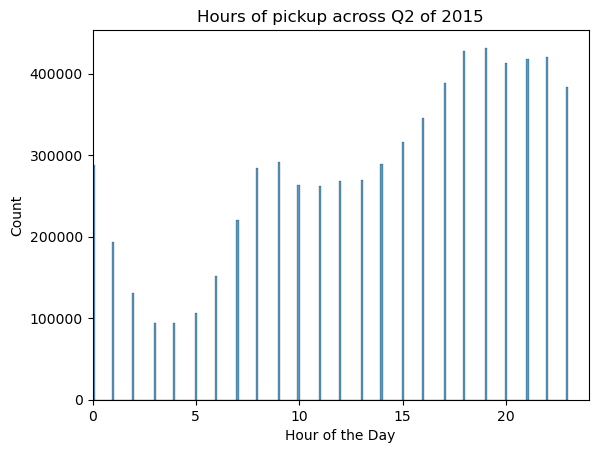

In [ ]:
#Creating a Histogram in Seaborn: 

# Histogram to check hours - Q2 2015

sns.histplot(q215['hour'], palette = '#1fbad6')
plt.xlim(0,24)
plt.xlabel('Hour of the Day')
plt.title('Hours of pickup across Q2 of 2015')
plt.show();


In [ ]:
# Histogram to check hours - Q1 2015

sns.histplot(q115['hour'], palette = '#1fbad6')
plt.xlim(0,24)
plt.xlabel('Hour of the Day')
plt.title('Hours of pickup across Q1 of 2015')
plt.show();

NameError: name 'q115' is not defined

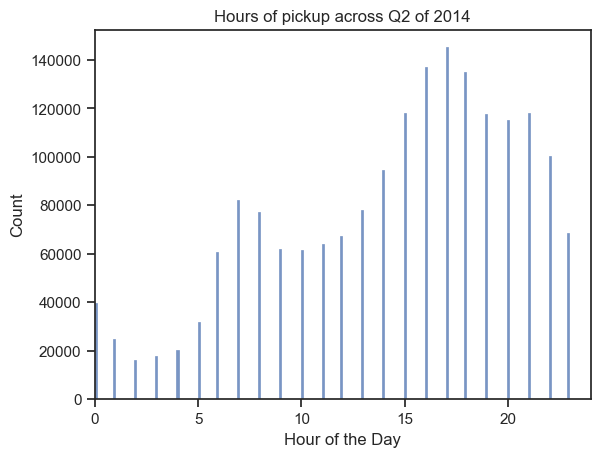

In [ ]:
# Histogram to check hours - Q2 2014

sns.histplot(q1402['hour'], palette = '#1fbad6')
plt.xlim(0,24)
plt.xlabel('Hour of the Day')
plt.title('Hours of pickup across Q2 of 2014')
plt.show();

In [ ]:
# Histogram to check days:

days_2015 = q215.groupby(['hour','day_name']).size().unstack()
days_reindex = days_2015.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
days_reindex.style.background_gradient()

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,25469,24522,28995,32851,43385,64770,68189
1,14984,14417,16119,18392,25036,47650,56383
2,9280,8575,9521,10838,15664,34500,42019
3,7085,5990,6698,7783,11157,24917,29930
4,10889,8614,9033,10269,13642,19847,21771
5,16761,14469,14466,15784,17082,14438,13892
6,25358,24097,24146,25258,25295,15043,12764
7,36005,38253,38480,39054,36968,17619,14264
8,45807,49790,48535,49221,48034,24125,19013


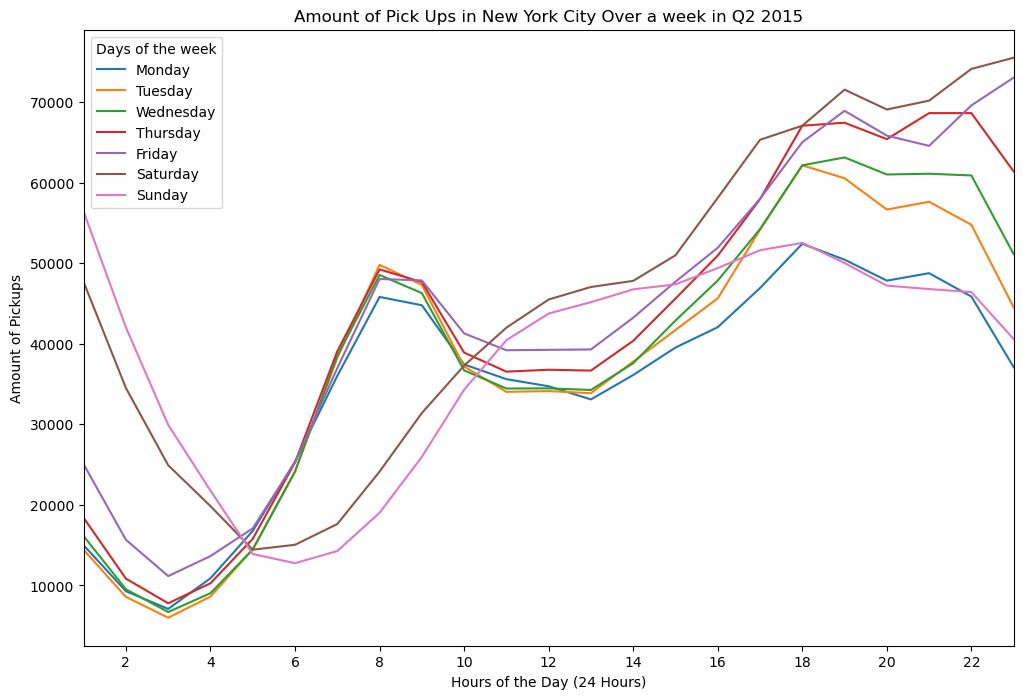

In [ ]:
#custom_thurs = ['#2D2D2D', '#C0C0C8', '#C0C0C8', '#1fbad6', '#C0C0C8', '#C0C0C8', '#C0C0C8']


plt.figure(figsize=(12,8))
sns.lineplot(data=days_reindex, dashes = False).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City Over a week in Q2 2015", xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);
plt.legend(title="Days of the week")
plt.show()

#### MOST POPULAR UBER BASE (Q2 - 2015)

In [ ]:
q215.shape 

(6751198, 7)

In [ ]:
q215.base_number.unique()

array(['B02598', 'B02764', 'B02682', 'B02765', 'B02617', 'B02512',
       'B02836', 'B02835'], dtype=object)

In [ ]:
#BREAKDOWN OF EACH BASE 
base_151 = q215.query('`base_number` == "B02512"') # BASE NAME = UNTER - 40.75258189875482, -74.0065557551885
base_152 = q215.query('`base_number` == "B02598"') # BASE NAME = HINTER - 40.75258189875482, -74.0065557551885
base_153 = q215.query('`base_number` == "B02617"') # BASE NAME = WEITER - 40.75258189875482, -74.0065557551885
base_154 = q215.query('`base_number` == "B02682"') # BASE NAME = SCHMECKEN - 40.75258189875482, -74.0065557551885
base_155 = q215.query('`base_number` == "B02764"') # BASE NAME = DANACH - NY - 40.75258189875482, -74.0065557551885
base_156 = q215.query('`base_number` == "B02765"') # BASE NAME = GRUN
base_157 = q215.query('`base_number` == "B02836"') # BASE NAME = DRINNEN 
base_158 = q215.query('`base_number` == "B02835"') # BASE NAME = DREIST 

In [ ]:
b1 = base_151.value_counts().sum()
b2 = base_152.value_counts().sum()
b3 = base_153.value_counts().sum()
b4 = base_154.value_counts().sum()
b5 = base_155.value_counts().sum()
b6 = base_156.value_counts().sum()
b7 = base_157.value_counts().sum()
b8 = base_158.value_counts().sum()

In [ ]:
print(b1)
print(b2)
print(b3)
print(b4)
print(b5)
print(b6)
print(b7)
print(b8)

103413
689467
900258
2015134
2315878
698637
1990
26421


In [ ]:
bases = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH', 'GRUN', 'DRINNEN', 'DREIST'],
        'Totals' : [b1, b2, b3,  b4,  b5,  b6, b7, b8]}

bases15 = pd.DataFrame(bases)

In [ ]:
bases15

,Base,Totals
0,UNTER,103413
1,HINTER,689467
2,WEITER,900258
3,CHMECKEN,2015134
4,DANACH,2315878
5,GRUN,698637
6,DRINNEN,1990
7,DREIST,26421


In [ ]:
x151 = bases15['Base']
y151 = bases15['Totals']

#### MOST POPULAR BASE (Q2 - 2015)

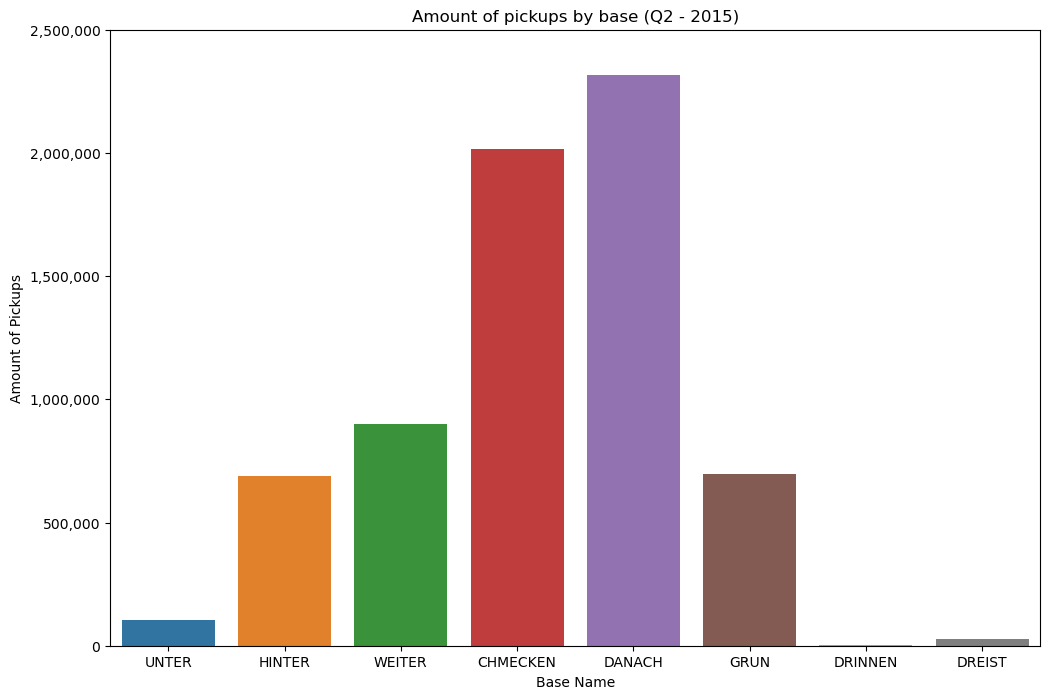

In [ ]:
plt.figure(figsize= (12,8))
sns.barplot(x = x151, y = y151, data = bases15).set(xlabel = "Base Name", ylabel = "Amount of Pickups", title = "Amount of pickups by base (Q2 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000'], yticks = [0, 500000, 1000000, 1500000, 2000000, 2500000], ylim = (0,2500000));
plt.show()

#### MOST POPULAR MONTH FOR PICK UPS

In [ ]:
# CREATING A NEW DATA FRAME CALLED DAYS_15 
days_15 = q215.copy()

In [ ]:
q215.head()

,date,month,day,day_name,hour,base_number,location_id
6477194,2015-04-01 00:01:00,April,1,Wednesday,0,B02598,158
6477195,2015-04-01 00:02:00,April,1,Wednesday,0,B02764,148
6477196,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,45
6477197,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,231
6477198,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,234


In [ ]:
q215.tail()

,date,base_number,location_id,month,day_name,hour,day
14270471,2015-06-30 23:59:00,B02764,161,June,Tuesday,23,30
14270472,2015-06-30 23:59:00,B02764,80,June,Tuesday,23,30
14270473,2015-06-30 23:59:00,B02764,255,June,Tuesday,23,30
14270474,2015-06-30 23:59:00,B02764,246,June,Tuesday,23,30
14270478,2015-06-30 23:59:00,B02682,88,June,Tuesday,23,30


In [ ]:
q215.shape

(6751198, 7)

In [ ]:
days_15.head()

,date,base_number,location_id,month,day_name,hour,day
6477194,2015-04-01 00:01:00,B02598,158,April,Wednesday,0,1
6477195,2015-04-01 00:02:00,B02764,148,April,Wednesday,0,1
6477196,2015-04-01 00:03:00,B02764,45,April,Wednesday,0,1
6477197,2015-04-01 00:03:00,B02764,231,April,Wednesday,0,1
6477198,2015-04-01 00:03:00,B02764,234,April,Wednesday,0,1


In [ ]:
mon15 = days_15.query('`day_name` == "Monday"')
tues15 = days_15.query('`day_name` == "Tuesday"')
wed15 = days_15.query('`day_name` == "Tuesday"')
thur15 = days_15.query('`day_name` == "Thursday"') 
fri15 = days_15.query('`day_name` == "Friday"') 
sat15 = days_15.query('`day_name` == "Saturday"') 
sun15 = days_15.query('`day_name` == "Sunday"') 

In [ ]:
print(len(mon15))
print(len(tues15))
print(len(wed15))
print(len(thur15))
print(len(fri15))
print(len(sat15))
print(len(sun15))

824191
890691
890691
999315
1050842
1115726
946419


In [ ]:
total_mon = len(mon15)
total_tues = len(tues15)
total_wed = len(wed15)
total_thur = len(thur15)
total_fri = len(fri15)
total_sat = len(sat15)
total_sun = len(sun15)

In [ ]:
# Creating a data frame for the most popular weekday for pick ups

day_of_week = {
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'count': [total_mon, total_tues, total_wed, total_thur, total_fri, total_sat, total_sun],
}

# Convert data to a DataFrame
most_pop_day = pd.DataFrame(day_of_week)

In [ ]:
most_pop_day

,day_of_week,count
0,Monday,824191
1,Tuesday,890691
2,Wednesday,890691
3,Thursday,999315
4,Friday,1050842
5,Saturday,1115726
6,Sunday,946419


In [ ]:
xa = most_pop_day['day_of_week']
ya = most_pop_day['count']

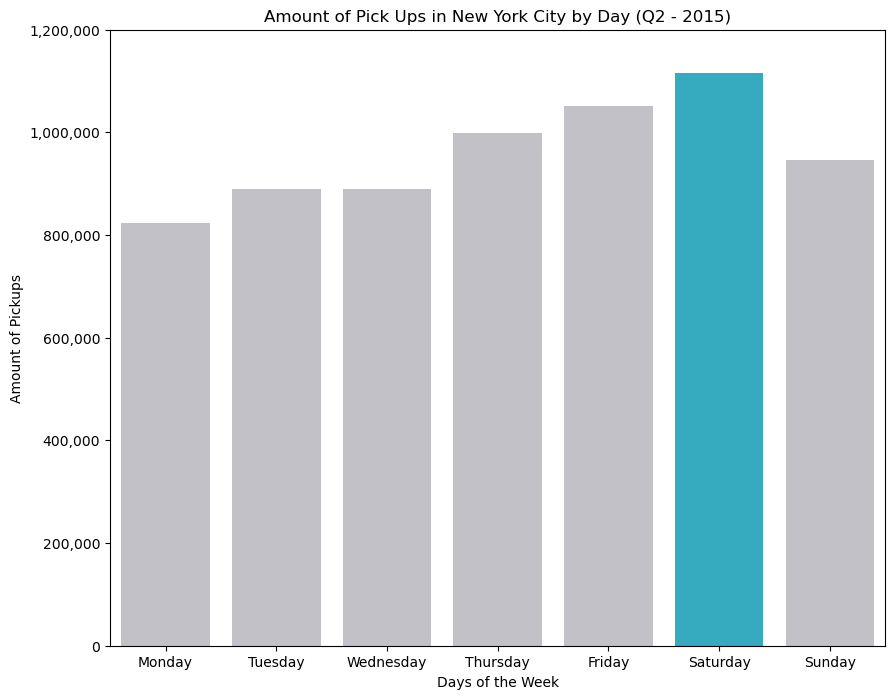

In [ ]:
custom_colours6 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = xa, y = ya, palette = custom_colours6).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q2 - 2015)", yticklabels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', ], ylim = (0,1200000));
plt.show()

MOST POPULAR MONTH: 

In [ ]:
df_0414.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
df_0414.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [ ]:
df_1504


,date,month,day,day_name,hour,base_number,location_id
6477194,2015-04-01 00:01:00,April,1,Wednesday,0,B02598,158
6477195,2015-04-01 00:02:00,April,1,Wednesday,0,B02764,148
6477196,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,45
6477197,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,231
6477198,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,234
...,...,...,...,...,...,...,...
8758022,2015-04-30 23:59:00,April,30,Thursday,23,B02765,90
8758023,2015-04-30 23:59:00,April,30,Thursday,23,B02765,68
8758024,2015-04-30 23:59:00,April,30,Thursday,23,B02764,158
8758026,2015-04-30 23:59:00,April,30,Thursday,23,B02764,231


In [ ]:
apr_15 = len(df_1504)
may_15 = len(df_1505)
jun_15 = len(df_1506)

In [ ]:
apr_15

1991220

In [ ]:
pop_month = {
    'month': ['April', 'May', 'June'],
    'count': [apr_15, may_15, jun_15],
}

# Convert data to a DataFrame
most_pop_month = pd.DataFrame(pop_month)

In [ ]:
most_pop_month.head()

,month,count
0,April,1991220
1,May,2338203
2,June,2421775


In [ ]:
xb = most_pop_month['month']
yb = most_pop_month['count']

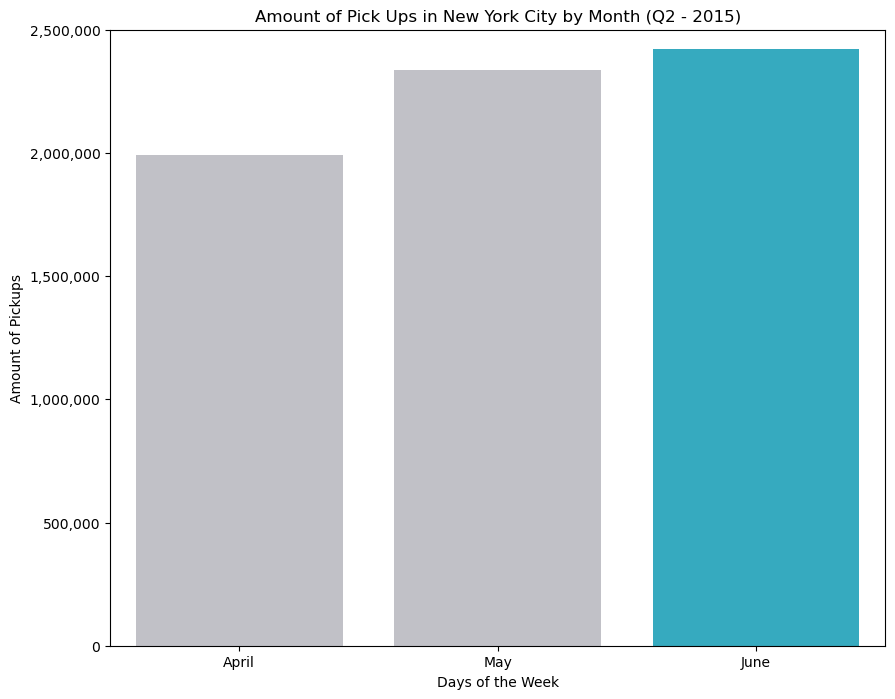

In [ ]:
custom_colours7 = ['#c0c0c8', '#c0c0c8', '#1fbad6']

plt.figure(figsize= (10,8))
sns.barplot(x = xb, y = yb, palette=custom_colours7).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q2 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

LINE PLOT PICK-UPS ON A MONTH BASIS - Q2 2014 / Q2 2015

In [ ]:
data_3 = {
    'month': ['April', 'May', 'June'],
    'count_14': [556767, 642360, 653158],
    'count_15': [apr_15, may_15, jun_15]
}

# Convert data to a DataFrame
comp_month_graph = pd.DataFrame(data_3)

In [ ]:
pickup = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000']
pickups = [0, 500000, 1000000, 1500000, 2000000, 2500000]
uber_blue = '#1fbad6'
uber_grey = '#c0c0c8'

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x = comp_month_graph.month,  y=comp_month_graph['count_14'], data=comp_month_graph, label = 'Q2 - 2014', marker = 'o', color = uber_grey).set()
ax = sns.lineplot(x = comp_month_graph.month,  y=comp_month_graph['count_15'], data=comp_month_graph, label = 'Q2 - 2015', marker = 'o', color = uber_blue)
plt.title('Difference between Pick Ups per Month')
plt.ylabel('Amount of Pickups')
plt.xlabel('Months of the Q2')
plt.yticks(pickups, pickup)
plt.ylim(0, 2500000)
plt.legend()
plt.show();

NameError: name 'comp_month_graph' is not defined

<Figure size 1200x600 with 0 Axes>

#### CREATING 1ST QUARTER  - 2015 DATAFRAME 

In [ ]:
q1502.head()

,date,month,day,day_name,hour,base_number,location_id
0,2015-01-01 00:00:05,January,1,Thursday,0,B02764,255
1,2015-01-01 00:00:05,January,1,Thursday,0,B02598,144
2,2015-01-01 00:00:08,January,1,Thursday,0,B02682,113
3,2015-01-01 00:00:11,January,1,Thursday,0,B02682,234
4,2015-01-01 00:00:13,January,1,Thursday,0,B02764,232


In [ ]:
df_2015 = q1502.copy()

In [ ]:
df_2015.columns

Index(['date', 'month', 'day', 'day_name', 'hour', 'base_number',
       'location_id'],
      dtype='object')

In [ ]:
df_2015.sort_values(by='date', ascending= True, inplace = True)

In [ ]:
df_2015.head()

,date,month,day,day_name,hour,base_number,location_id
0,2015-01-01 00:00:05,January,1,Thursday,0,B02764,255
1,2015-01-01 00:00:05,January,1,Thursday,0,B02598,144
2,2015-01-01 00:00:08,January,1,Thursday,0,B02682,113
3,2015-01-01 00:00:11,January,1,Thursday,0,B02682,234
4,2015-01-01 00:00:13,January,1,Thursday,0,B02764,232


In [ ]:
df_2015.shape

(12830107, 7)

In [ ]:
df_2015.duplicated().sum() # CHECKING HOW MANY DUPLICATE VALUES ARE IN THE NEW DATAFRAMEdf_2015
df_2015.drop_duplicates(inplace = True) #DROPPING DUPLICATE VALUES IN DATAFRAME
df_2015.shape # CHECKING DUPLICATE VALUES HAVE BEEN REMOVED FROM DATAFRAME


(12830107, 7)

In [ ]:
df_2015.isnull().sum()

date           0
month          0
day            0
day_name       0
hour           0
base_number    0
location_id    0
dtype: int64

In [ ]:
df_2015.dropna(inplace = True) 

In [ ]:
df_2015.dtypes

date           datetime64[ns]
month                  object
day                     int32
day_name               object
hour                    int32
base_number            object
location_id             int64
dtype: object

In [ ]:
df_2015['Pickup_date'] = pd.to_datetime(df_2015['date'])

ValueError: cannot assemble with duplicate keys

In [ ]:
df_2015['hours'] = df_2015['Pickup_date'].dt.hour

KeyError: 'Pickup_date'

In [ ]:
df_2015['month'] = df_2015['Pickup_date'].dt.month

In [ ]:
df_2015['day_name'] = df_2015['Pickup_date'].dt.day_name()

In [ ]:
df_2015.dtypes

date           datetime64[ns]
month                   int32
day                     int32
day_name               object
hour                    int32
base_number            object
location_id             int64
date           datetime64[ns]
hours                   int32
dtype: object

In [ ]:
df_2015.head()

,date,month,day,day_name,hour,base_number,location_id,date,hours
0,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255,2015-01-01 00:00:05,0
1,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144,2015-01-01 00:00:05,0
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113,2015-01-01 00:00:08,0
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234,2015-01-01 00:00:11,0
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232,2015-01-01 00:00:13,0


In [ ]:
df_2015.rename({'Pickup_date':'date', 'Dispatching_base_num': 'base', 'locationID':'location_id', 'month':'month', 'day_name':'day_name', 'hours':'hours'}, axis = 1, inplace= True)

In [ ]:
df_2015.head()

,date,month,day,day_name,hour,base_number,location_id,date,hours
0,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255,2015-01-01 00:00:05,0
1,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144,2015-01-01 00:00:05,0
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113,2015-01-01 00:00:08,0
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234,2015-01-01 00:00:11,0
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232,2015-01-01 00:00:13,0


In [ ]:
df_2015 = df_2015.reindex(['date', 'base', 'location_id', 'month', 'day_name', 'hours'], axis = 1)

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
df_2015.head()

,date,month,day,day_name,hour,base_number,location_id,date,hours
0,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255,2015-01-01 00:00:05,0
1,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144,2015-01-01 00:00:05,0
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113,2015-01-01 00:00:08,0
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234,2015-01-01 00:00:11,0
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232,2015-01-01 00:00:13,0


In [ ]:
df_2015.reset_index(0, inplace = True)

In [ ]:
df_2015.drop('index', axis = 1, inplace = True)

In [ ]:
df_2015.head()

,date,month,day,day_name,hour,base_number,location_id,date,hours
0,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255,2015-01-01 00:00:05,0
1,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144,2015-01-01 00:00:05,0
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113,2015-01-01 00:00:08,0
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234,2015-01-01 00:00:11,0
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232,2015-01-01 00:00:13,0


#### GETTING 2015 Q1 DATA: 

In [ ]:
jan15 = df_2015.query('`month` == 1')
feb15 = df_2015.query('`month` == 2')
mar15 = df_2015.query('`month` == 3')

In [ ]:
# Checking new dataframes created 
jan15.head()
jan15.tail()
feb15.head()
feb15.tail()
mar15.head()
mar15.tail()

,date,month,day,day_name,hour,base_number,location_id,date,hours
6078904,2015-03-31 23:59:00,3,31,Tuesday,23,B02598,41,2015-03-31 23:59:00,23
6078905,2015-03-31 23:59:00,3,31,Tuesday,23,B02598,163,2015-03-31 23:59:00,23
6078906,2015-03-31 23:59:00,3,31,Tuesday,23,B02598,142,2015-03-31 23:59:00,23
6078907,2015-03-31 23:59:00,3,31,Tuesday,23,B02617,200,2015-03-31 23:59:00,23
6078908,2015-03-31 23:59:00,3,31,Tuesday,23,B02617,113,2015-03-31 23:59:00,23


In [ ]:
jan_15 = len(jan15)
feb_15 = len(feb15)
mar_15 = len(mar15)

In [ ]:
print(len(jan15))
print(len(feb15))
print(len(mar15))

1916557
2218800
1943552


In [ ]:
q115_month = {
    'month': ['January', 'February', 'March'],
    'count': [jan_15, feb_15, mar_15],
}

# Convert data to a DataFrame
q1_15_month  = pd.DataFrame(q115_month)

In [ ]:
q1_15_month.head()

,month,count
0,January,1916557
1,February,2218800
2,March,1943552


In [ ]:
xc = q1_15_month['month']
yc = q1_15_month['count']

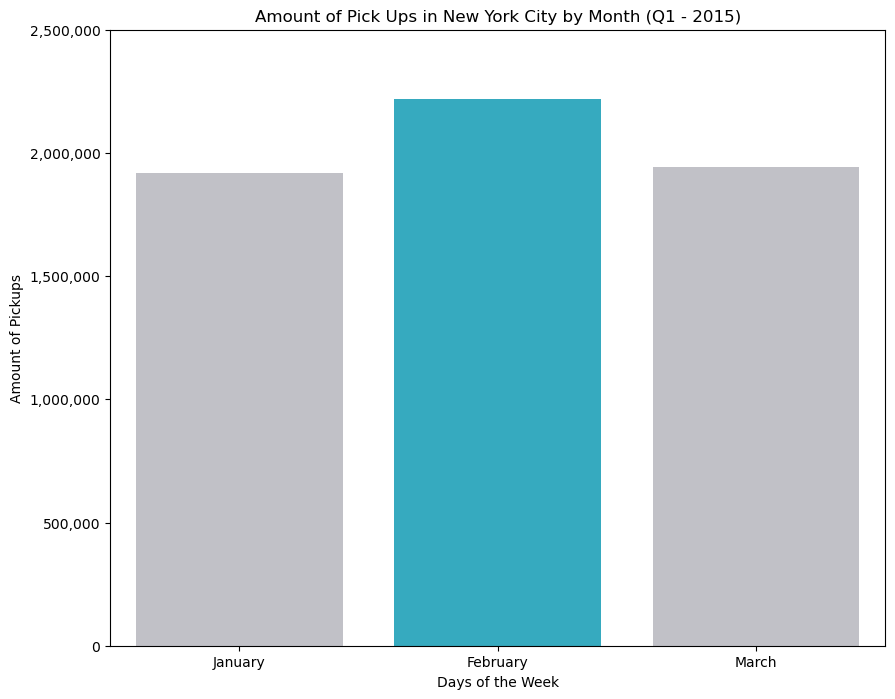

In [ ]:
#CREATING A BARPLOT

custom_q15 = ['#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = xc, y = yc, palette=custom_q15).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q1 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()



#### Q1 - 2015 - Dataframe

In [ ]:
jan15 = df_2015.query('`month` == 1')
feb15 = df_2015.query('`month` == 2')
mar15 = df_2015.query('`month` == 3')

In [ ]:
#Concat dataframe for Q2 in 2015: 

q115 = pd.DataFrame()

q115 = pd.concat([jan15, feb15, mar15])

q115.shape # Checking the new concat dataframe called 'Q115' 

(6078909, 9)

In [ ]:
q115.head()

,date,month,day,day_name,hour,base_number,location_id,date,hours
0,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255,2015-01-01 00:00:05,0
1,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144,2015-01-01 00:00:05,0
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113,2015-01-01 00:00:08,0
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234,2015-01-01 00:00:11,0
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232,2015-01-01 00:00:13,0


In [ ]:
q115.tail()

,date,month,day,day_name,hour,base_number,location_id,date,hours
6078904,2015-03-31 23:59:00,3,31,Tuesday,23,B02598,41,2015-03-31 23:59:00,23
6078905,2015-03-31 23:59:00,3,31,Tuesday,23,B02598,163,2015-03-31 23:59:00,23
6078906,2015-03-31 23:59:00,3,31,Tuesday,23,B02598,142,2015-03-31 23:59:00,23
6078907,2015-03-31 23:59:00,3,31,Tuesday,23,B02617,200,2015-03-31 23:59:00,23
6078908,2015-03-31 23:59:00,3,31,Tuesday,23,B02617,113,2015-03-31 23:59:00,23


#### Q1/Q2 2015 - Most Popular Month

In [ ]:
q1215_month = {
    'month': ['January', 'February', 'March','April', 'May', 'June'],
    'count': [jan_15, feb_15, mar_15, apr_15, may_15, jun_15],
}

# Convert data to a DataFrame
q12_15_month  = pd.DataFrame(q1215_month)

In [ ]:
q12_15_month.head()

,month,count
0,January,1916557
1,February,2218800
2,March,1943552
3,April,1991220
4,May,2338203


In [ ]:
xd = q12_15_month['month']
yd = q12_15_month['count']

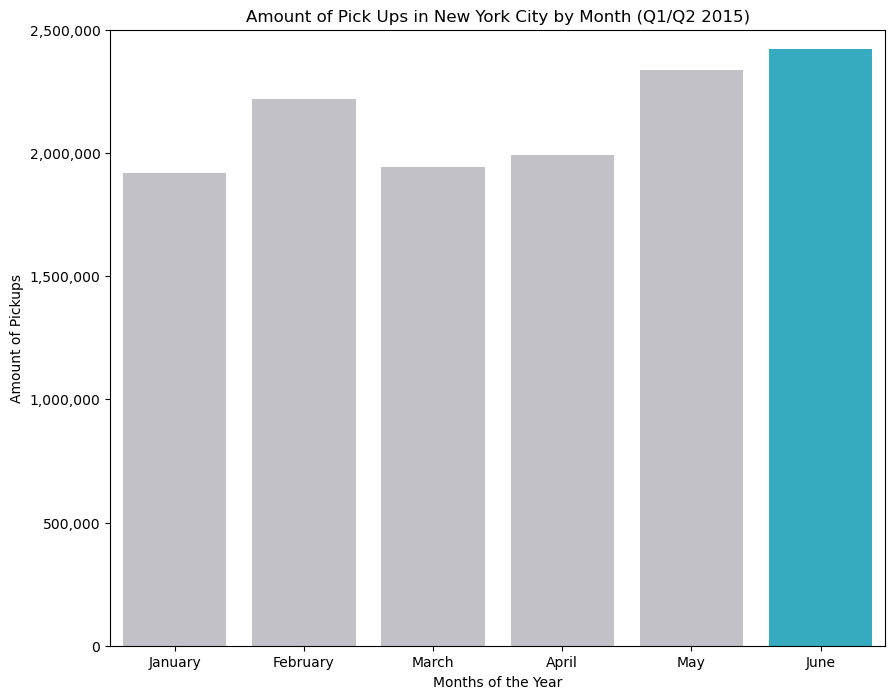

In [ ]:
cc1 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6']


plt.figure(figsize= (10,8))
sns.barplot(x = xd, y = yd, palette = cc1).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q1/Q2 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

In [ ]:
df_2015.head()

,date,month,day,day_name,hour,base_number,location_id,date,hours
0,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255,2015-01-01 00:00:05,0
1,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144,2015-01-01 00:00:05,0
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113,2015-01-01 00:00:08,0
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234,2015-01-01 00:00:11,0
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232,2015-01-01 00:00:13,0


In [ ]:
q115 = pd.DataFrame() 

df_q115 = pd.concat([jan15,feb15,mar15,q115])

print(df_q115)

                       date  month  day  day_name  hour base_number  \
0       2015-01-01 00:00:05      1    1  Thursday     0      B02764   
1       2015-01-01 00:00:05      1    1  Thursday     0      B02598   
2       2015-01-01 00:00:08      1    1  Thursday     0      B02682   
3       2015-01-01 00:00:11      1    1  Thursday     0      B02682   
4       2015-01-01 00:00:13      1    1  Thursday     0      B02764   
...                     ...    ...  ...       ...   ...         ...   
6078904 2015-03-31 23:59:00      3   31   Tuesday    23      B02598   
6078905 2015-03-31 23:59:00      3   31   Tuesday    23      B02598   
6078906 2015-03-31 23:59:00      3   31   Tuesday    23      B02598   
6078907 2015-03-31 23:59:00      3   31   Tuesday    23      B02617   
6078908 2015-03-31 23:59:00      3   31   Tuesday    23      B02617   

         location_id                date  hours  
0                255 2015-01-01 00:00:05      0  
1                144 2015-01-01 00:00:05      0

In [ ]:
q115_time = df_q115.groupby(['hours','day_name']).size().unstack()
q115_time_reindex = q115_time.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
q115_time_reindex.style.background_gradient()

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hours,,,,,,,
0,20713,16652,19278,28134,32748,59799,63889
1,11520,8975,10406,17575,18312,43139,49932
2,6892,5416,6160,13840,11114,30150,34218
3,5263,3709,4105,10629,7702,21178,25938
4,7763,5730,6151,10126,9166,15308,17393
5,12847,10187,10196,12666,12127,11135,10965
6,21143,19808,19530,21314,20681,11257,9779
7,33554,33923,33897,36187,34971,13233,10275
8,43809,43659,43801,46308,44785,18453,13851


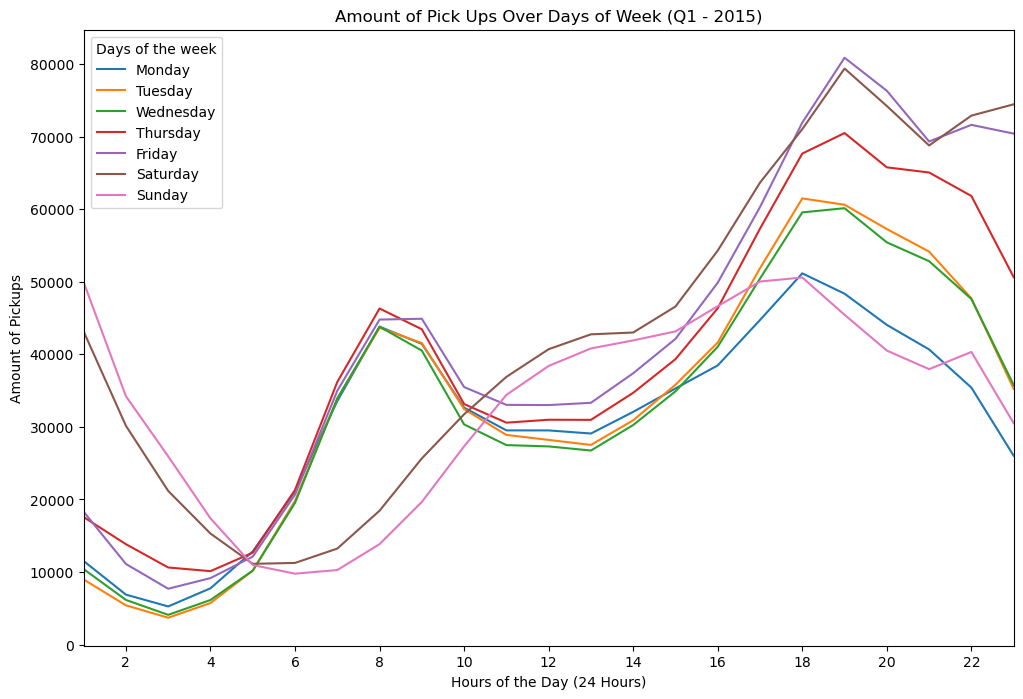

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=q115_time_reindex, dashes = False,).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups Over Days of Week (Q1 - 2015)",  xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);
plt.legend(title="Days of the week")
plt.show()

#### HEATMAP BY DAY NUMBER AND HOUR - Q1 2015

In [ ]:
df_q115.head()

,date,month,day,day_name,hour,base_number,location_id,date,hours
0,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255,2015-01-01 00:00:05,0
1,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144,2015-01-01 00:00:05,0
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113,2015-01-01 00:00:08,0
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234,2015-01-01 00:00:11,0
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232,2015-01-01 00:00:13,0


In [ ]:
q115_hour = df_q115.groupby(['hours','day']).size().unstack()
q115_hour.style.background_gradient()

day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
hours,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,16272,4140,4959,6737,4695,6099,10287,11210,4541,6841,8907,5017,7493,11575,11598,7210,7586,8688,5841,6622,11033,12272,6034,7721,8374,5048,6002,10607,6714,3941,7149
1,13920,2410,3153,3957,2612,3448,7240,8492,2436,4437,5925,2626,4172,8208,8627,4333,4672,5650,3400,3604,7630,9486,2862,5412,5494,2748,3349,7592,5130,2003,4831
2,12893,1387,2144,2415,1464,2112,4934,3600,1361,2931,3934,1559,2561,5626,6067,2818,3124,4024,2082,2315,5008,6846,1647,3962,4015,1623,1943,5288,3767,1227,3113
3,9614,1055,1604,1762,1005,1456,3375,5088,1046,1894,2414,1143,1796,4114,4629,2108,2096,2704,1439,1555,3446,4546,1170,3081,2675,1285,1371,3579,2620,817,2037
4,5934,1406,1728,1725,1582,1740,2600,3857,1467,1784,2122,1806,2190,3298,3612,2313,2153,2290,1787,2120,2787,3188,1839,2588,2251,1840,1672,2922,2140,1265,1631
5,3314,2251,2161,2335,2632,2506,2226,2793,2614,2231,2474,2900,2849,2941,2732,3123,2684,2524,2604,2991,2650,2593,3073,2786,2556,3109,2136,2538,1923,2131,1743
6,2557,4008,3772,3972,4849,4488,3068,3222,5066,3801,3738,4980,4686,3597,3257,4414,4501,3964,4338,5312,3319,3240,5258,4774,4150,5444,3673,3589,2475,3477,2523
7,2196,6643,6228,6521,8617,7919,4478,4703,8292,6340,6272,8508,8176,5283,4454,6647,6649,6248,6856,9088,4900,4550,8296,7684,6498,9271,5980,5217,3828,5992,3706
8,2869,8715,7905,8236,10972,10258,6066,6227,10509,8164,8282,11265,10721,7068,5826,8822,8855,8162,9162,11496,6552,5791,10606,9852,8296,11838,7652,7048,4828,7600,5023


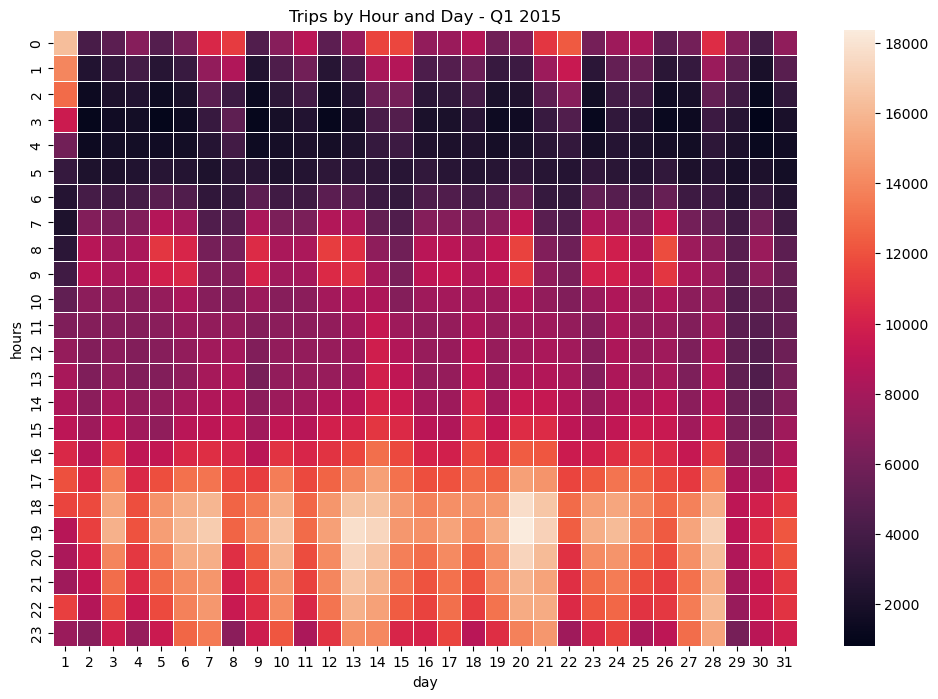

In [ ]:
# Trips by Hour and Day - Q1 2015 

plt.figure(figsize = (12,8))

sns.heatmap(q115_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q1 2015")
plt.show()

In [ ]:
# Trips by Hour and Day - Q2 2015 

plt.figure(figsize = (12,8))

sns.heatmap(q115_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q1 2015")
plt.show()

In [ ]:
q215.head()

,date,month,day,day_name,hour,base_number,location_id
6477194,2015-04-01 00:01:00,April,1,Wednesday,0,B02598,158
6477195,2015-04-01 00:02:00,April,1,Wednesday,0,B02764,148
6477196,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,45
6477197,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,231
6477198,2015-04-01 00:03:00,April,1,Wednesday,0,B02764,234


In [ ]:
q215.tail()

,date,month,day,day_name,hour,base_number,location_id
14270471,2015-06-30 23:59:00,June,30,Tuesday,23,B02764,161
14270472,2015-06-30 23:59:00,June,30,Tuesday,23,B02764,80
14270473,2015-06-30 23:59:00,June,30,Tuesday,23,B02764,255
14270474,2015-06-30 23:59:00,June,30,Tuesday,23,B02764,246
14270478,2015-06-30 23:59:00,June,30,Tuesday,23,B02682,88


In [ ]:
q215_hour = q215.groupby(['hour','day']).size().unstack()
q215_hour.style.background_gradient()

day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5961,9290,10302,8066,9308,9185,9549,7282,9228,10390,8586,10817,9016,9603,8064,9497,12182,9573,11085,9520,9798,7101,8109,9778,11764,11479,9419,10921,7789,10006,5513
1,4057,6068,8910,5021,5938,6063,6639,3835,5943,6691,5510,7333,5947,6583,4308,6492,7841,6163,8095,6532,7335,4363,5384,6247,7932,8088,6660,7640,4488,6485,4390
2,2577,3975,6166,3316,3980,3905,4524,2497,3770,4499,3777,5045,4054,4687,2514,4399,5046,4159,5506,4570,5571,2641,3694,4229,5245,5690,4672,5208,2884,4316,3281
3,1772,2715,3878,2462,2916,2914,3333,1828,2690,3200,2662,3519,2942,3346,1835,3036,3521,2900,3818,3518,3957,2014,2699,3126,3733,4069,3724,3942,2024,3026,2441
4,2619,2783,3336,2664,2799,2914,3194,2416,2777,3019,2731,3286,3015,3230,2678,3030,3333,3043,3535,3441,3768,2834,2879,3063,3236,3772,3656,3375,2770,3120,1749
5,3721,3253,3377,3276,3036,3529,3161,3639,3209,3232,3290,3513,3350,3306,3865,3766,3572,3596,3652,3679,3716,4118,3702,3339,3205,3954,3703,3477,4029,3435,1192
6,5751,4806,4314,4792,4500,4889,4512,5620,4600,4780,4947,4738,4983,4738,6035,5469,5085,5146,5118,5145,4932,6084,5194,4716,4077,5107,5186,4834,5986,4857,1020
7,8626,7341,5999,6886,6643,7343,6718,8565,7095,6753,6848,6796,7289,6931,8986,7364,7507,7391,7297,7623,7109,8751,7347,6970,5415,7091,7452,7377,8774,7173,1183
8,11202,9786,7933,8303,8579,8861,8594,10811,9523,8752,9031,8885,9037,9051,11387,9895,9561,9764,9583,10078,9102,10908,9680,9076,7152,9025,9489,9338,11084,9430,1625


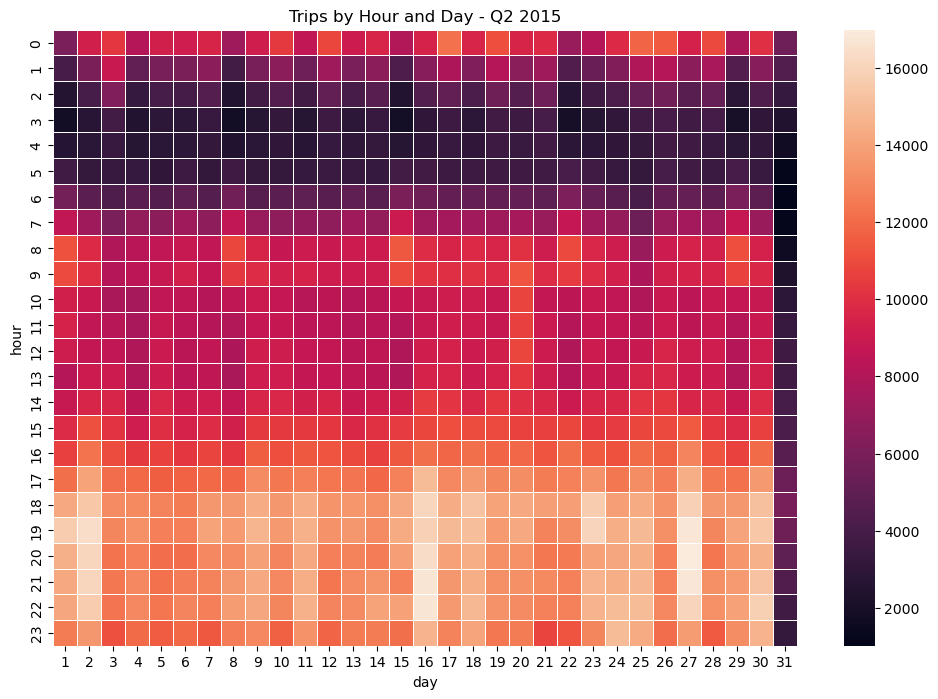

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(q215_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q2 2015")
plt.show()

In [ ]:
q1402.head()

,date_time,lat,lon,base,hours,day_name,hour,month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,Tuesday,0,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,Tuesday,0,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,Tuesday,0,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,Tuesday,0,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,Tuesday,0,4


In [ ]:
q1402.tail()

,date_time,lat,lon,base,hours,day_name,hour,month,day
663839,2014-06-30 22:40:00,40.7332,-73.9872,B02764,22,Monday,22,6,30
663840,2014-06-30 23:12:00,40.7905,-73.9796,B02764,23,Monday,23,6,30
663841,2014-06-30 23:13:00,40.7640,-73.9887,B02764,23,Monday,23,6,30
663842,2014-06-30 23:15:00,40.7262,-73.9944,B02764,23,Monday,23,6,30
663843,2014-06-30 23:35:00,40.7404,-73.9848,B02764,23,Monday,23,6,30


In [ ]:
# Trips by Hour and Day - Q2 2014 

q214_hour = q1402.groupby(['hours','day']).size().unstack()
q214_hour.style.background_gradient()


day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
hours,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1569,696,1208,1668,1123,2091,1223,1492,776,1143,1690,1063,1806,1107,1283,741,1150,2073,1115,1120,1207,1372,736,1046,1077,1766,1953,1280,1473,811,759
1,915,349,708,916,624,1292,716,891,485,673,878,705,1095,674,805,409,625,1329,663,780,809,901,437,603,667,1633,1224,855,1091,456,460
2,539,254,443,618,390,752,452,585,340,462,539,431,603,438,582,293,468,802,476,489,551,656,303,414,470,1022,687,574,892,335,328
3,536,421,466,605,524,600,558,577,575,504,581,500,614,575,529,508,499,755,546,582,609,637,549,519,545,777,700,659,762,541,257
4,548,711,572,683,688,684,649,646,846,608,612,684,690,604,585,752,701,651,728,636,717,657,860,639,600,654,733,696,626,767,144
5,918,1179,904,913,1337,984,901,1176,1463,1003,969,1072,1009,996,935,1261,983,879,1052,921,986,1027,1348,1031,898,790,1069,1130,961,1405,169
6,1721,2473,1899,1904,2411,1856,1989,2350,3050,2028,2102,2028,2049,1897,1771,2423,1820,1431,1998,1736,1818,1920,2374,1788,1797,1315,1792,1917,1982,2717,254
7,2501,3148,2490,2664,2998,2411,2534,3034,4011,2658,2820,2782,2950,2509,2461,3274,2620,2193,2612,2363,2381,2522,3221,2535,2637,1841,2526,2573,2607,3747,361
8,2374,2782,2220,2290,3021,2320,2291,3043,3849,2486,2705,2579,2927,2191,2369,2920,2358,2222,2457,2348,2202,2462,2832,2404,2329,1874,2278,2296,2403,3676,494


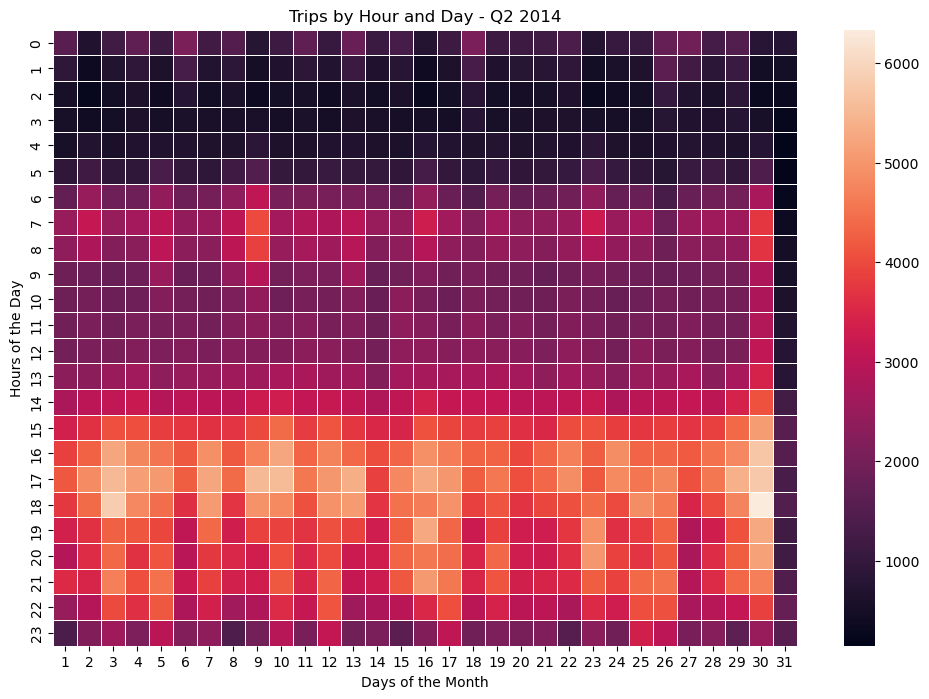

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(q214_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q2 2014")
plt.xlabel('Days of the Month')
plt.ylabel('Hours of the Day')
plt.show()

#### MOST POPULAR DAY - Q1 2015

In [ ]:
# Trips by Hour and Day - Q1 2015 

q115_hour = q115.groupby(['hours','day']).size().unstack()
q115_hour.style.background_gradient()


day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
hours,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,16272,4140,4959,6737,4695,6099,10287,11210,4541,6841,8907,5017,7493,11575,11598,7210,7586,8688,5841,6622,11033,12272,6034,7721,8374,5048,6002,10607,6714,3941,7149
1,13920,2410,3153,3957,2612,3448,7240,8492,2436,4437,5925,2626,4172,8208,8627,4333,4672,5650,3400,3604,7630,9486,2862,5412,5494,2748,3349,7592,5130,2003,4831
2,12893,1387,2144,2415,1464,2112,4934,3600,1361,2931,3934,1559,2561,5626,6067,2818,3124,4024,2082,2315,5008,6846,1647,3962,4015,1623,1943,5288,3767,1227,3113
3,9614,1055,1604,1762,1005,1456,3375,5088,1046,1894,2414,1143,1796,4114,4629,2108,2096,2704,1439,1555,3446,4546,1170,3081,2675,1285,1371,3579,2620,817,2037
4,5934,1406,1728,1725,1582,1740,2600,3857,1467,1784,2122,1806,2190,3298,3612,2313,2153,2290,1787,2120,2787,3188,1839,2588,2251,1840,1672,2922,2140,1265,1631
5,3314,2251,2161,2335,2632,2506,2226,2793,2614,2231,2474,2900,2849,2941,2732,3123,2684,2524,2604,2991,2650,2593,3073,2786,2556,3109,2136,2538,1923,2131,1743
6,2557,4008,3772,3972,4849,4488,3068,3222,5066,3801,3738,4980,4686,3597,3257,4414,4501,3964,4338,5312,3319,3240,5258,4774,4150,5444,3673,3589,2475,3477,2523
7,2196,6643,6228,6521,8617,7919,4478,4703,8292,6340,6272,8508,8176,5283,4454,6647,6649,6248,6856,9088,4900,4550,8296,7684,6498,9271,5980,5217,3828,5992,3706
8,2869,8715,7905,8236,10972,10258,6066,6227,10509,8164,8282,11265,10721,7068,5826,8822,8855,8162,9162,11496,6552,5791,10606,9852,8296,11838,7652,7048,4828,7600,5023


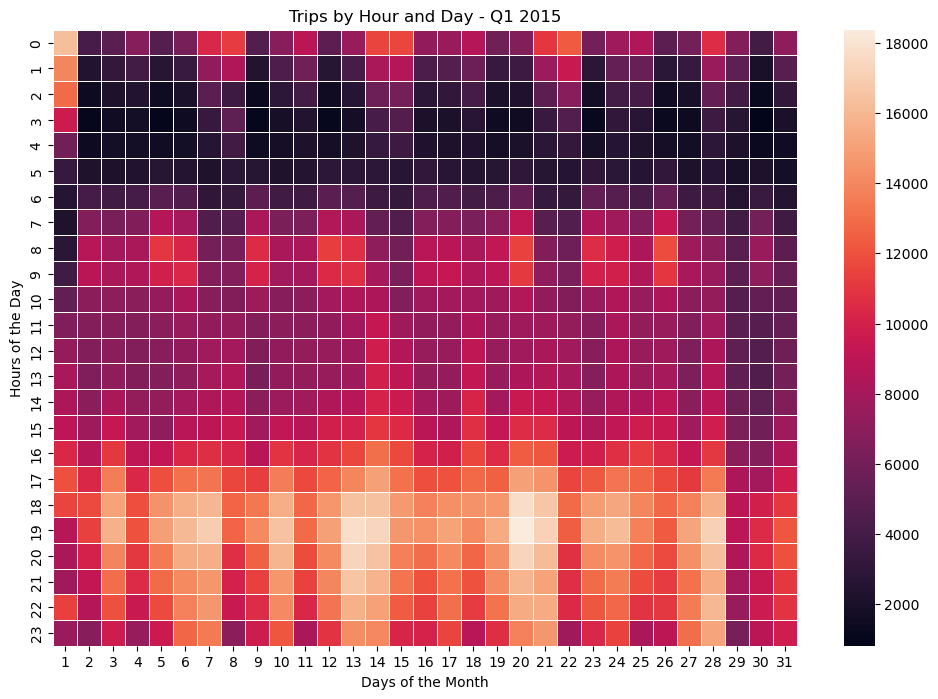

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(q115_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q1 2015")
plt.xlabel('Days of the Month')
plt.ylabel('Hours of the Day')
plt.show()

In [ ]:
mon_15 = df_2015.query('`day_name` == "Monday"')
tues_15 = df_2015.query('`day_name` == "Tuesday"')
wed_15 = df_2015.query('`day_name` == "Wednesday"')
thurs_15 = df_2015.query('`day_name` == "Thursday"')
fri_15 = df_2015.query('`day_name` == "Friday"')
sat_15 = df_2015.query('`day_name` == "Saturday"')
sun_15 = df_2015.query('`day_name` == "Sunday"')

In [ ]:
pop_mon = len(mon_15)
pop_tue = len(tues_15)
pop_wed = len(wed_15)
pop_thur = len(thurs_15)
pop_fri = len(fri_15)
pop_sat = len(sat_15)
pop_sun = len(sun_15)

In [ ]:
q1215_day = {
    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'count': [pop_mon, pop_tue, pop_wed, pop_thur, pop_fri, pop_sat, pop_sun],
}

# Convert data to a DataFrame
q12_15_day  = pd.DataFrame(q1215_day)

In [ ]:
q12_15_day.head(10)

,day,count
0,Monday,1546110
1,Tuesday,1673998
2,Wednesday,1697872
3,Thursday,1924278
4,Friday,2052250
5,Saturday,2165311
6,Sunday,1770288


In [ ]:
xe = q12_15_day['day']
ye = q12_15_day['count']

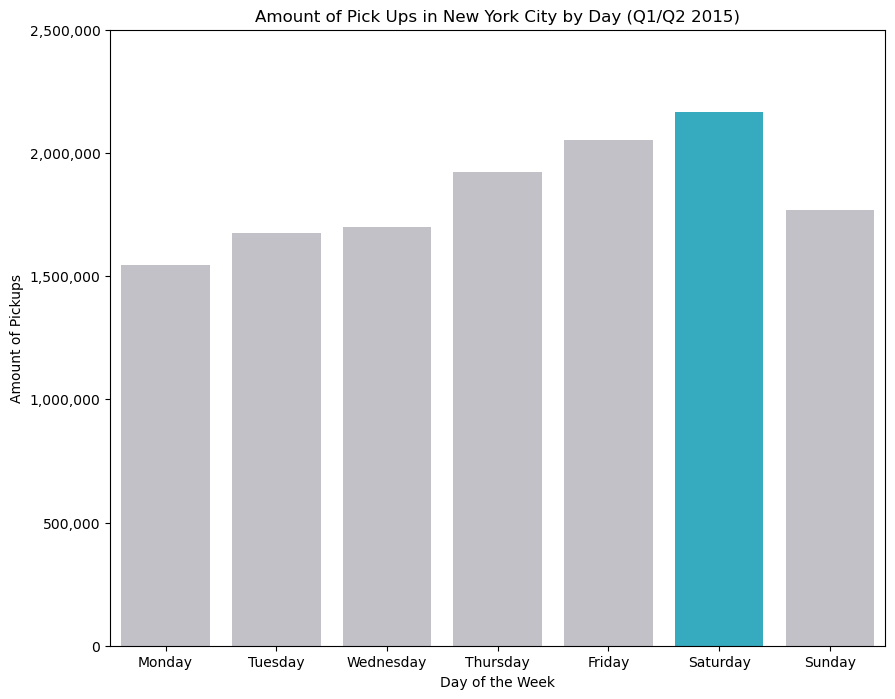

In [ ]:
cc_sat = ['#c0c0c8','#c0c0c8','#c0c0c8','#c0c0c8','#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = xe, y = ye, palette= cc_sat).set(xlabel = "Day of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q1/Q2 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

#### Q1/Q2 (2015) - Most Popular Day (Line) 

,day,count
0,Monday,1546110
1,Tuesday,1673998
2,Wednesday,1697872
3,Thursday,1924278
4,Friday,2052250


#### Q1/Q2 (2015) - Most Popular Day (Bar)

#### Q1/Q2(14)/Q2(15) - Most Pickups by Month

In [ ]:
months.head()

,Months,Totals
0,April,556767
1,May,642360
2,June,653158


In [ ]:
q1_15_month.head()

,month,count
0,January,1916557
1,February,2218800
2,March,1943552


In [ ]:
most_pop_month.head()

,month,count
0,April,1991220
1,May,2338203
2,June,2421775


#### PAIRPLOT 

Pair plot of Q2 - 2015

In [ ]:
q215.head()
q215pp = q215.copy()

In [ ]:
q115pp.drop(['date','hours'], axis = 1, inplace = True)
q115pp.head()

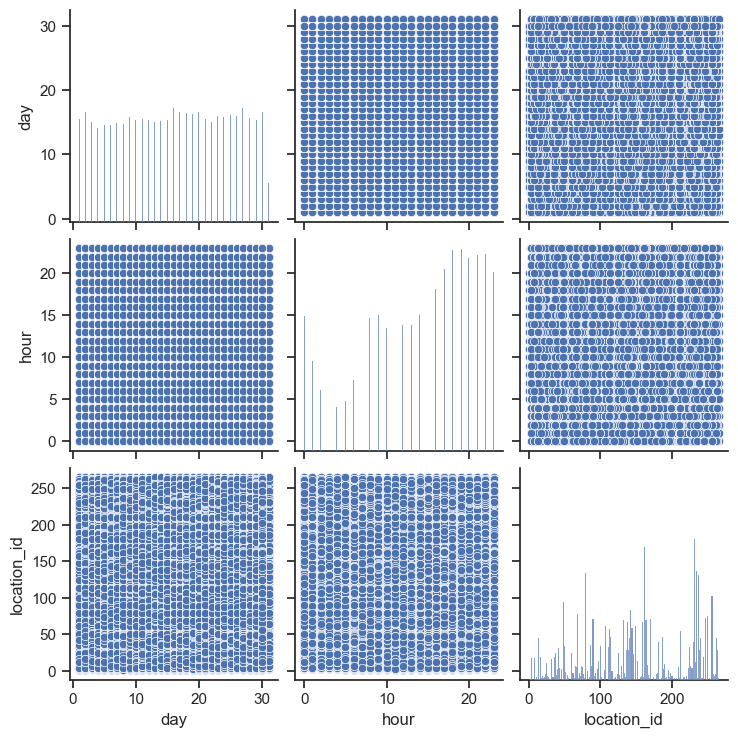

In [ ]:
sns.set_theme(style = "ticks")
sns.pairplot(q215)
plt.show()

Pair plot of Q1 - 2015

In [ ]:
q115pp = q115.copy()
q115pp.drop(['date','hours'], axis = 1, inplace = True)
q115pp.head()

,month,day,day_name,hour,base_number,location_id
0,1,1,Thursday,0,B02764,255
1,1,1,Thursday,0,B02598,144
2,1,1,Thursday,0,B02682,113
3,1,1,Thursday,0,B02682,234
4,1,1,Thursday,0,B02764,232


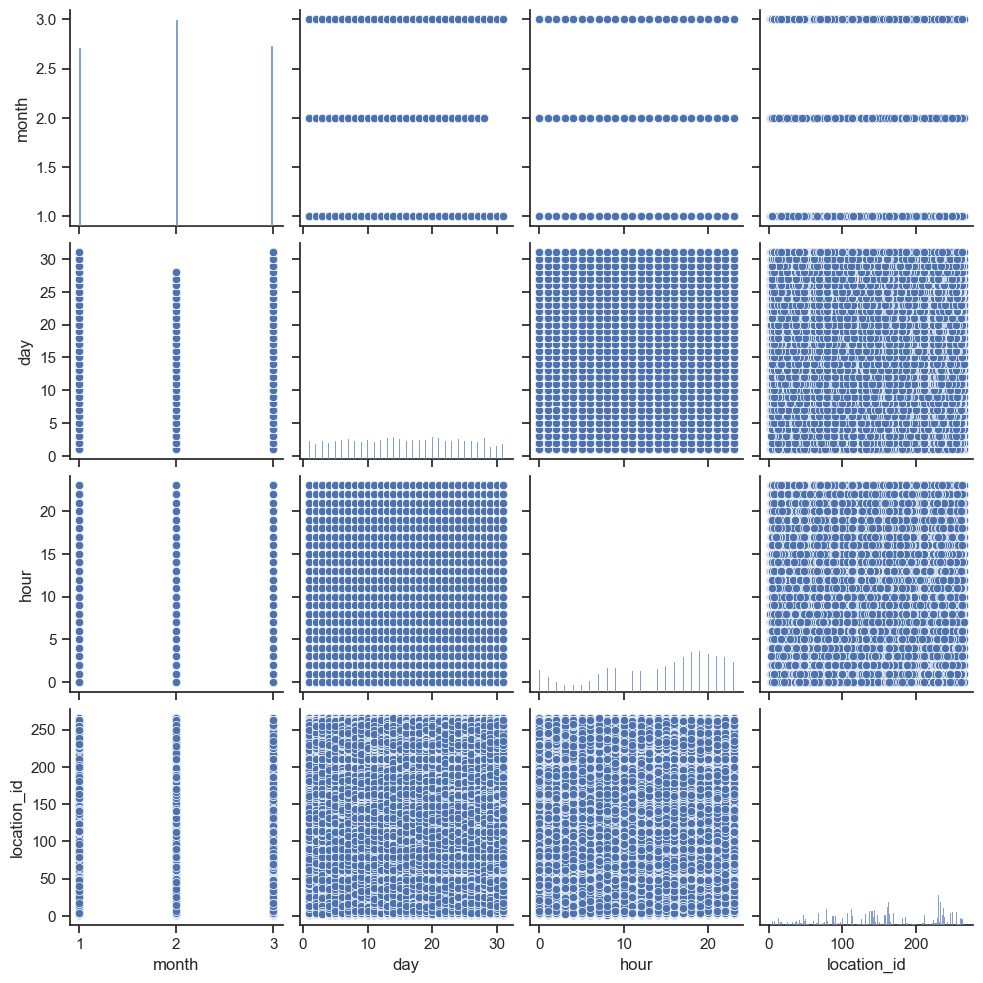

In [ ]:
sns.set_theme(style = "ticks")
sns.pairplot(q115pp)
plt.show()

pairplot of Q2 - 2014

In [ ]:

q1402pp = q1402.copy()
q1402pp.drop(['date_time', 'lat', 'lon', 'base', 'hours'], axis = 1, inplace = True)

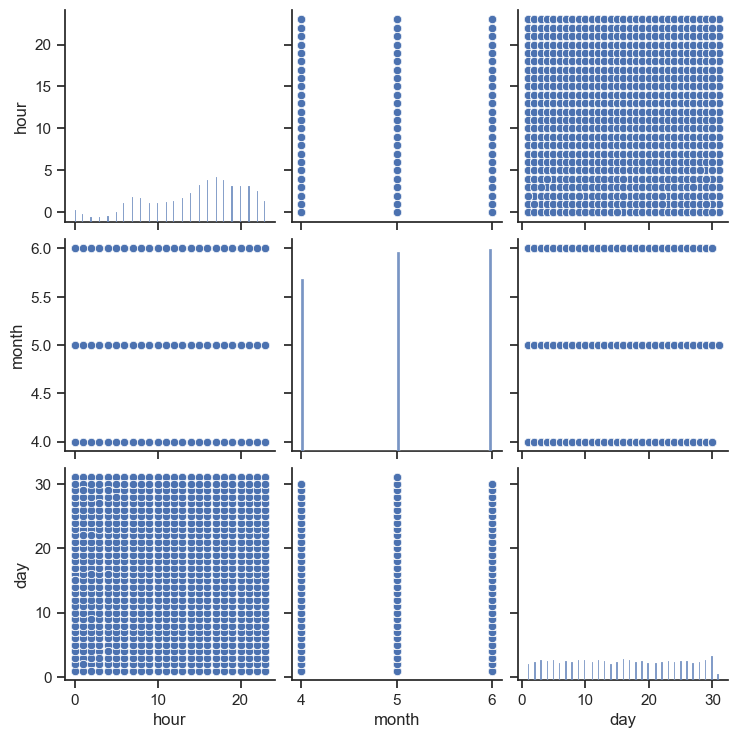

In [ ]:
sns.set_theme(style = "ticks")
sns.pairplot(q1402pp)
plt.show()

#### FINDING OUTLIERS

In [ ]:
q115.head()

,date,month,day,day_name,hour,base_number,location_id,date,hours
0,2015-01-01 00:00:05,1,1,Thursday,0,B02764,255,2015-01-01 00:00:05,0
1,2015-01-01 00:00:05,1,1,Thursday,0,B02598,144,2015-01-01 00:00:05,0
2,2015-01-01 00:00:08,1,1,Thursday,0,B02682,113,2015-01-01 00:00:08,0
3,2015-01-01 00:00:11,1,1,Thursday,0,B02682,234,2015-01-01 00:00:11,0
4,2015-01-01 00:00:13,1,1,Thursday,0,B02764,232,2015-01-01 00:00:13,0


In [ ]:
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    upper = q3 + 1.5*(q3-q1)
    lower = q1 - 1.5*(q3-q1)
    return upper , lower

find_outliers(q115['hour'])

(34.0, -6.0)

In [ ]:
sf = gpd.read_file(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\NYC Taxi Zones\geo_export_70ae9294-3624-4270-b277-a9eead8a9542.shp")
sf.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [ ]:
sf.shape

(263, 7)

In [ ]:
sf = sf.set_geometry('geometry')

In [ ]:
sf.shape

(263, 7)

<Figure size 2000x1600 with 0 Axes>

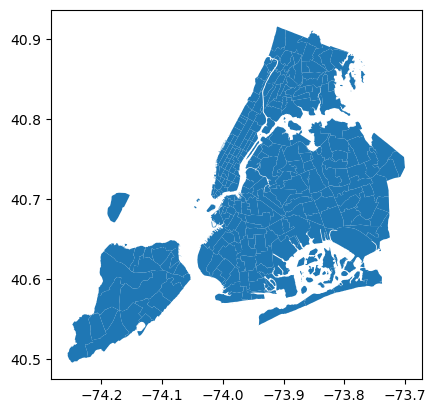

In [ ]:
plt.figure(figsize=(20,16))
sf.plot()
plt.show()


In [ ]:
df_2015.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [ ]:
df_pickups = df_2015['locationID'].value_counts().to_frame()
df_pickups.reset_index(inplace=True)
df_pickups.columns = ['locationID', 'count']
df_pickups.head()


,locationID,count
0,161,460732
1,231,420356
2,234,419045
3,79,407591
4,249,323989
